#📌 Extracción

### 🛠️ Preparación del Entorno

In [1]:
# ============================================
# PASO 1: EXTRACCIÓN DE DATOS (Extract)
# ============================================

# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json
from datetime import datetime

# Configurar idioma español en visualizaciones
plt.rcParams['font.sans-serif'] = ['Arial']
sns.set_style("whitegrid")

# URL del dataset
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"

# Cargar los datos desde la API
response = requests.get(url)
datos_json = response.json()

# Convertir a DataFrame de Pandas
df = pd.DataFrame(datos_json)

# Mostrar información básica del dataset
print("=" * 60)
print("📊 INFORMACIÓN BÁSICA DEL DATASET")
print("=" * 60)
print(f"\nForma del dataset: {df.shape}")
print(f"Filas: {df.shape[0]}")
print(f"Columnas: {df.shape[1]}")
print("\n" + "=" * 60)
print("PRIMERAS 5 FILAS:")
print("=" * 60)
print(df.head())
print("\n" + "=" * 60)
print("TIPOS DE DATOS:")
print("=" * 60)
print(df.dtypes)

📊 INFORMACIÓN BÁSICA DEL DATASET

Forma del dataset: (7267, 6)
Filas: 7267
Columnas: 6

PRIMERAS 5 FILAS:
   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'Interne

#🔧 Transformación

In [2]:
# ============================================
# PASO 2a: DESEMPACAR DATOS ANIDADOS
# ============================================

print("=" * 60)
print("🔧 DESEMPAQUETANDO DATOS ANIDADOS")
print("=" * 60)

# Crear copia del dataframe
df_limpio = df.copy()

# Función auxiliar para desempacar diccionarios
def desempacar_columna(df, col_name):
    """Expande una columna con diccionarios en múltiples columnas"""
    return pd.json_normalize(df[col_name])

# Desempacar la columna 'customer'
customer_data = desempacar_columna(df_limpio, 'customer')
print("\nDatos de 'customer' desempaquetados:")
print(customer_data.head())

# Desempacar la columna 'phone'
phone_data = desempacar_columna(df_limpio, 'phone')
print("\nDatos de 'phone' desempaquetados:")
print(phone_data.head())

# Desempacar la columna 'internet'
internet_data = desempacar_columna(df_limpio, 'internet')
print("\nDatos de 'internet' desempaquetados:")
print(internet_data.head())

# Desempacar la columna 'account'
account_data = desempacar_columna(df_limpio, 'account')
print("\nDatos de 'account' desempaquetados:")
print(account_data.head())

# Concatenar todas las columnas desempaquetadas con customerID y Churn
df_limpio = pd.concat([
    df_limpio[['customerID', 'Churn']],
    customer_data,
    phone_data,
    internet_data,
    account_data
], axis=1)

print("\n" + "=" * 60)
print("✅ DATAFRAME DESPUÉS DEL DESEMPAQUETAMIENTO")
print("=" * 60)
print(f"Forma: {df_limpio.shape}")
print(f"\nColumnas:\n{df_limpio.columns.tolist()}")
print(f"\nPrimeras filas:")
print(df_limpio.head(3))

🔧 DESEMPAQUETANDO DATOS ANIDADOS

Datos de 'customer' desempaquetados:
   gender  SeniorCitizen Partner Dependents  tenure
0  Female              0     Yes        Yes       9
1    Male              0      No         No       9
2    Male              0      No         No       4
3    Male              1     Yes         No      13
4  Female              1     Yes         No       3

Datos de 'phone' desempaquetados:
  PhoneService MultipleLines
0          Yes            No
1          Yes           Yes
2          Yes            No
3          Yes            No
4          Yes            No

Datos de 'internet' desempaquetados:
  InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport  \
0             DSL             No          Yes               No         Yes   
1             DSL             No           No               No          No   
2     Fiber optic             No           No              Yes          No   
3     Fiber optic             No          Yes             

In [3]:
# ============================================
# PASO 2b: EXPLORACIÓN Y VERIFICACIÓN DE INCONSISTENCIAS
# ============================================

print("=" * 70)
print("🔍 EXPLORACIÓN DEL DATASET DESEMPAQUETADO")
print("=" * 70)

# 1. INFORMACIÓN GENERAL
print("\n1️⃣ INFORMACIÓN GENERAL DEL DATASET:")
print("-" * 70)
print(f"Número de filas: {df_limpio.shape[0]}")
print(f"Número de columnas: {df_limpio.shape[1]}")
print(f"\nColumnas disponibles:")
for i, col in enumerate(df_limpio.columns, 1):
    print(f"  {i:2d}. {col}")

# 2. TIPOS DE DATOS
print("\n" + "=" * 70)
print("2️⃣ TIPOS DE DATOS:")
print("=" * 70)
print(df_limpio.dtypes)

# 3. VALORES FALTANTES (MISSING VALUES)
print("\n" + "=" * 70)
print("3️⃣ VALORES FALTANTES (NULL/NaN):")
print("=" * 70)
missing = df_limpio.isnull().sum()
print(f"\nTotal de valores faltantes por columna:")
print(missing[missing > 0] if missing.sum() > 0 else "✅ No hay valores faltantes")

# 4. VALORES DUPLICADOS
print("\n" + "=" * 70)
print("4️⃣ VALORES DUPLICADOS:")
print("=" * 70)
duplicados = df_limpio.duplicated().sum()
print(f"Filas duplicadas: {duplicados}")
if duplicados > 0:
    print(f"Porcentaje: {(duplicados/len(df_limpio)*100):.2f}%")

# 5. VERIFICAR VALORES ÚNICOS POR COLUMNA
print("\n" + "=" * 70)
print("5️⃣ VALORES ÚNICOS POR COLUMNA:")
print("=" * 70)
print("\nColumnas categóricas (primeras 15 valores únicos):")
for col in df_limpio.select_dtypes(include='object').columns:
    unique_count = df_limpio[col].nunique()
    unique_values = df_limpio[col].unique()[:15]
    print(f"\n  📌 {col}: {unique_count} valores únicos")
    print(f"     Valores: {unique_values}")

print("\n" + "=" * 70)
print("6️⃣ ESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS:")
print("=" * 70)
print(df_limpio.describe())

# 7. DISTRIBUCIÓN DE CHURN (Variable objetivo)
print("\n" + "=" * 70)
print("7️⃣ DISTRIBUCIÓN DE CHURN (VARIABLE OBJETIVO):")
print("=" * 70)
print(f"\nRecuento absoluto:")
print(df_limpio['Churn'].value_counts())
print(f"\nRecuento porcentual:")
print(df_limpio['Churn'].value_counts(normalize=True) * 100)

🔍 EXPLORACIÓN DEL DATASET DESEMPAQUETADO

1️⃣ INFORMACIÓN GENERAL DEL DATASET:
----------------------------------------------------------------------
Número de filas: 7267
Número de columnas: 21

Columnas disponibles:
   1. customerID
   2. Churn
   3. gender
   4. SeniorCitizen
   5. Partner
   6. Dependents
   7. tenure
   8. PhoneService
   9. MultipleLines
  10. InternetService
  11. OnlineSecurity
  12. OnlineBackup
  13. DeviceProtection
  14. TechSupport
  15. StreamingTV
  16. StreamingMovies
  17. Contract
  18. PaperlessBilling
  19. PaymentMethod
  20. Charges.Monthly
  21. Charges.Total

2️⃣ TIPOS DE DATOS:
customerID           object
Churn                object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSuppo

In [4]:
# ============================================
# PASO 2c: MANEJO DE INCONSISTENCIAS
# ============================================

print("=" * 70)
print("🔧 CORRIGIENDO INCONSISTENCIAS")
print("=" * 70)

# Hacer una copia para trabajar
df_limpio = df_limpio.copy()

# 1. CORREGIR LA COLUMNA CHURN
print("\n1️⃣ CORRIGIENDO COLUMNA 'CHURN':")
print("-" * 70)
print(f"Valores antes: {df_limpio['Churn'].unique()}")
print(f"Registros con Churn vacío: {(df_limpio['Churn'] == '').sum()}")

# Reemplazar valores vacíos en Churn por 'No' (asumimos que cliente no canceló)
# Alternativa: podrías reemplazarlo por 'Unknown' o eliminar las filas
df_limpio['Churn'] = df_limpio['Churn'].replace('', 'No')

print(f"Valores después: {df_limpio['Churn'].unique()}")
print(f"\nDistribución de Churn después de la corrección:")
print(df_limpio['Churn'].value_counts())

# 2. CORREGIR TIPO DE DATO CHARGES.TOTAL
print("\n" + "=" * 70)
print("2️⃣ CORRIGIENDO COLUMNA 'CHARGES.TOTAL':")
print("-" * 70)
print(f"Tipo de dato antes: {df_limpio['Charges.Total'].dtype}")
print(f"Primeros valores: {df_limpio['Charges.Total'].head().tolist()}")

# Convertir a float
df_limpio['Charges.Total'] = pd.to_numeric(df_limpio['Charges.Total'], errors='coerce')
print(f"Tipo de dato después: {df_limpio['Charges.Total'].dtype}")
print(f"Primeros valores: {df_limpio['Charges.Total'].head().tolist()}")

# Verificar si hay NaN después de la conversión
nan_count = df_limpio['Charges.Total'].isna().sum()
if nan_count > 0:
    print(f"⚠️  Se generaron {nan_count} valores NaN durante la conversión")
else:
    print(f"✅ Conversión exitosa sin valores NaN")

# 3. VERIFICAR INCONSISTENCIAS EN MAYÚSCULAS/MINÚSCULAS
print("\n" + "=" * 70)
print("3️⃣ VERIFICANDO INCONSISTENCIAS DE MAYÚSCULAS/MINÚSCULAS:")
print("-" * 70)

# Obtener todas las columnas de texto
columnas_texto = df_limpio.select_dtypes(include='object').columns

inconsistencias_encontradas = False
for col in columnas_texto:
    valores_unicos = df_limpio[col].unique()
    # Verificar si hay inconsistencias (ej: 'yes' y 'Yes')
    valores_lower = [str(v).lower() for v in valores_unicos]
    if len(valores_lower) != len(set(valores_lower)):
        print(f"⚠️  Inconsistencia en {col}: {valores_unicos}")
        inconsistencias_encontradas = True

if not inconsistencias_encontradas:
    print("✅ No se encontraron inconsistencias de mayúsculas/minúsculas")

# 4. RESUMEN FINAL DE LIMPIEZA
print("\n" + "=" * 70)
print("4️⃣ RESUMEN FINAL DE LIMPIEZA:")
print("=" * 70)

print("\n📊 INFORMACIÓN DESPUÉS DE LIMPIEZA:")
print(f"Filas: {df_limpio.shape[0]}")
print(f"Columnas: {df_limpio.shape[1]}")
print(f"\n✅ Valores NULL totales: {df_limpio.isnull().sum().sum()}")
print(f"✅ Filas duplicadas: {df_limpio.duplicated().sum()}")
print(f"✅ Churn - Valores únicos: {df_limpio['Churn'].nunique()}")

print("\n📋 TIPOS DE DATOS FINALES:")
print(df_limpio.dtypes)

print("\n✅ DATASET LIMPIO Y LISTO PARA ANÁLISIS")

🔧 CORRIGIENDO INCONSISTENCIAS

1️⃣ CORRIGIENDO COLUMNA 'CHURN':
----------------------------------------------------------------------
Valores antes: ['No' 'Yes' '']
Registros con Churn vacío: 224
Valores después: ['No' 'Yes']

Distribución de Churn después de la corrección:
Churn
No     5398
Yes    1869
Name: count, dtype: int64

2️⃣ CORRIGIENDO COLUMNA 'CHARGES.TOTAL':
----------------------------------------------------------------------
Tipo de dato antes: object
Primeros valores: ['593.3', '542.4', '280.85', '1237.85', '267.4']
Tipo de dato después: float64
Primeros valores: [593.3, 542.4, 280.85, 1237.85, 267.4]
⚠️  Se generaron 11 valores NaN durante la conversión

3️⃣ VERIFICANDO INCONSISTENCIAS DE MAYÚSCULAS/MINÚSCULAS:
----------------------------------------------------------------------
✅ No se encontraron inconsistencias de mayúsculas/minúsculas

4️⃣ RESUMEN FINAL DE LIMPIEZA:

📊 INFORMACIÓN DESPUÉS DE LIMPIEZA:
Filas: 7267
Columnas: 21

✅ Valores NULL totales: 11
✅ Filas 

In [5]:
# ============================================
# PASO 2c (CONTINUACIÓN): INVESTIGAR Y RESOLVER NaN
# ============================================

print("=" * 70)
print("🔍 INVESTIGANDO VALORES NaN EN CHARGES.TOTAL")
print("=" * 70)

# 1. ENCONTRAR REGISTROS CON NaN EN CHARGES.TOTAL
print("\n1️⃣ REGISTROS CON VALORES NaN:")
print("-" * 70)

# Filtrar filas con NaN en Charges.Total
filas_nan = df_limpio[df_limpio['Charges.Total'].isna()]
print(f"Cantidad de registros con NaN: {len(filas_nan)}")
print(f"\nDetalles de los registros con NaN:")
print(filas_nan[['customerID', 'Churn', 'tenure', 'Charges.Monthly', 'Charges.Total']])

# 2. ANALIZAR EL PATRÓN
print("\n" + "=" * 70)
print("2️⃣ ANÁLISIS DE PATRONES:")
print("-" * 70)

print(f"\nTenure de clientes con NaN:")
print(filas_nan['tenure'].describe())
print(f"\nCharges.Monthly de clientes con NaN:")
print(filas_nan['Charges.Monthly'].describe())

# 3. ESTRATEGIA DE MANEJO
print("\n" + "=" * 70)
print("3️⃣ ESTRATEGIA DE MANEJO:")
print("-" * 70)

print("""
Opciones:
1. Eliminar los 11 registros (0.15% del dataset)
2. Imputar con 0 (cliente nuevo, sin gastos acumulados)
3. Imputar con la media/mediana
4. Calcular como Charges.Monthly * tenure

Recomendación: Opción 4 (calcular) - parece lógica si son clientes nuevos
""")

# 4. APLICAR ESTRATEGIA - CALCULAR CHARGES.TOTAL
print("\n" + "=" * 70)
print("4️⃣ APLICANDO CORRECCIÓN:")
print("-" * 70)

# Crear copia para la corrección
df_limpio_corregido = df_limpio.copy()

# Para registros con NaN, calcular Charges.Total = Charges.Monthly * tenure
mask_nan = df_limpio_corregido['Charges.Total'].isna()
df_limpio_corregido.loc[mask_nan, 'Charges.Total'] = (
    df_limpio_corregido.loc[mask_nan, 'Charges.Monthly'] *
    df_limpio_corregido.loc[mask_nan, 'tenure']
)

print(f"✅ Valores NaN corregidos: {mask_nan.sum()}")
print(f"\nRegistros después de la corrección:")
print(df_limpio_corregido[df_limpio_corregido['customerID'].isin(filas_nan['customerID'])][
    ['customerID', 'Churn', 'tenure', 'Charges.Monthly', 'Charges.Total']
])

# 5. VERIFICACIÓN FINAL
print("\n" + "=" * 70)
print("5️⃣ VERIFICACIÓN FINAL:")
print("=" * 70)

print(f"✅ Total de NaN en Charges.Total: {df_limpio_corregido['Charges.Total'].isna().sum()}")
print(f"✅ Total de NULL en todo el dataset: {df_limpio_corregido.isnull().sum().sum()}")
print(f"\n✅ DATASET COMPLETAMENTE LIMPIO Y LISTO")

# Actualizar df_limpio con la versión corregida
df_limpio = df_limpio_corregido

print("\n" + "=" * 70)
print("📊 ESTADÍSTICAS FINALES DE CHARGES.TOTAL:")
print("=" * 70)
print(df_limpio[['Charges.Monthly', 'Charges.Total']].describe())

🔍 INVESTIGANDO VALORES NaN EN CHARGES.TOTAL

1️⃣ REGISTROS CON VALORES NaN:
----------------------------------------------------------------------
Cantidad de registros con NaN: 11

Detalles de los registros con NaN:
      customerID Churn  tenure  Charges.Monthly  Charges.Total
975   1371-DWPAZ    No       0            56.05            NaN
1775  2520-SGTTA    No       0            20.00            NaN
1955  2775-SEFEE    No       0            61.90            NaN
2075  2923-ARZLG    No       0            19.70            NaN
2232  3115-CZMZD    No       0            20.25            NaN
2308  3213-VVOLG    No       0            25.35            NaN
2930  4075-WKNIU    No       0            73.35            NaN
3134  4367-NUYAO    No       0            25.75            NaN
3203  4472-LVYGI    No       0            52.55            NaN
4169  5709-LVOEQ    No       0            80.85            NaN
5599  7644-OMVMY    No       0            19.85            NaN

2️⃣ ANÁLISIS DE PATRONES:


In [6]:
# ============================================
# PASO 2d: CREAR COLUMNA DE CUENTAS DIARIAS
# ============================================

print("=" * 70)
print("💰 CREANDO COLUMNA DE CUENTAS DIARIAS")
print("=" * 70)

print("""
¿Por qué crear esta columna?
- Proporciona una visión más detallada del comportamiento de clientes
- Útil para análisis de valor diario por cliente
- Facilita comparaciones normalizadas entre clientes
- Ayuda a identificar patrones de gasto diario
""")

# 1. CALCULAR CUENTAS DIARIAS
print("\n1️⃣ CALCULANDO CUENTAS DIARIAS:")
print("-" * 70)

# Crear la nueva columna
# Cuentas_Diarias = Charges.Monthly / 30 (aproximadamente 30 días por mes)
df_limpio['Cuentas_Diarias'] = df_limpio['Charges.Monthly'] / 30

print("✅ Fórmula utilizada: Cuentas_Diarias = Charges.Monthly / 30")
print(f"\nPrimeros 10 registros:")
print(df_limpio[['customerID', 'Charges.Monthly', 'Cuentas_Diarias']].head(10))

# 2. ESTADÍSTICAS DE LA NUEVA COLUMNA
print("\n" + "=" * 70)
print("2️⃣ ESTADÍSTICAS DE CUENTAS_DIARIAS:")
print("=" * 70)
print(df_limpio['Cuentas_Diarias'].describe())

# 3. COMPARACIÓN ANTES Y DESPUÉS
print("\n" + "=" * 70)
print("3️⃣ COMPARACIÓN DE COLUMNAS:")
print("=" * 70)

comparacion = df_limpio[['Charges.Monthly', 'Cuentas_Diarias']].head(15)
comparacion['Ratio'] = comparacion['Charges.Monthly'] / comparacion['Cuentas_Diarias']
print(comparacion)

# 4. ESTRUCTURA FINAL DEL DATASET
print("\n" + "=" * 70)
print("4️⃣ ESTRUCTURA FINAL DEL DATASET:")
print("=" * 70)
print(f"\nForma: {df_limpio.shape}")
print(f"Columnas: {df_limpio.shape[1]}")
print(f"\nLista de columnas:")
for i, col in enumerate(df_limpio.columns, 1):
    print(f"  {i:2d}. {col}")

# 5. INFORMACIÓN GENERAL FINAL
print("\n" + "=" * 70)
print("5️⃣ RESUMEN FINAL DE TRANSFORMACIÓN:")
print("=" * 70)
print(f"""
✅ Registros: {df_limpio.shape[0]:,}
✅ Columnas: {df_limpio.shape[1]}
✅ Valores NULL: {df_limpio.isnull().sum().sum()}
✅ Filas duplicadas: {df_limpio.duplicated().sum()}
✅ Nueva columna agregada: Cuentas_Diarias
✅ Dataset listo para análisis exploratorio
""")

print("=" * 70)
print("✅ TRANSFORMACIÓN COMPLETADA - PASAMOS AL ANÁLISIS")
print("=" * 70)

💰 CREANDO COLUMNA DE CUENTAS DIARIAS

¿Por qué crear esta columna?
- Proporciona una visión más detallada del comportamiento de clientes
- Útil para análisis de valor diario por cliente
- Facilita comparaciones normalizadas entre clientes
- Ayuda a identificar patrones de gasto diario


1️⃣ CALCULANDO CUENTAS DIARIAS:
----------------------------------------------------------------------
✅ Fórmula utilizada: Cuentas_Diarias = Charges.Monthly / 30

Primeros 10 registros:
   customerID  Charges.Monthly  Cuentas_Diarias
0  0002-ORFBO            65.60         2.186667
1  0003-MKNFE            59.90         1.996667
2  0004-TLHLJ            73.90         2.463333
3  0011-IGKFF            98.00         3.266667
4  0013-EXCHZ            83.90         2.796667
5  0013-MHZWF            69.40         2.313333
6  0013-SMEOE           109.70         3.656667
7  0014-BMAQU            84.65         2.821667
8  0015-UOCOJ            48.20         1.606667
9  0016-QLJIS            90.45         3.0150

In [7]:
# ============================================
# PASO 2e: ESTANDARIZACIÓN Y TRANSFORMACIÓN
# ============================================

print("=" * 70)
print("🔄 ESTANDARIZACIÓN Y TRANSFORMACIÓN DE DATOS")
print("=" * 70)

print("""
Objetivo:
- Convertir valores "Yes"/"No" a 1/0 (binarios)
- Mejorar legibilidad y procesamiento matemático
- Preparar datos para modelos predictivos
- Facilitar visualizaciones más claras
""")

# Crear copia para transformación
df_transformado = df_limpio.copy()

# 1. CONVERTIR CHURN A BINARIO
print("\n1️⃣ TRANSFORMANDO COLUMNA 'CHURN':")
print("-" * 70)
print(f"Valores antes: {df_transformado['Churn'].unique()}")
df_transformado['Churn'] = (df_transformado['Churn'] == 'Yes').astype(int)
print(f"Valores después: {df_transformado['Churn'].unique()}")
print(f"Distribución: \n{df_transformado['Churn'].value_counts()}")

# 2. CONVERTIR VARIABLES BINARIAS SI/NO A 1/0
print("\n" + "=" * 70)
print("2️⃣ TRANSFORMANDO VARIABLES BINARIAS 'YES'/'NO':")
print("-" * 70)

# Columnas que tienen solo Yes/No
columnas_binarias = [
    'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling'
]

for col in columnas_binarias:
    print(f"\n  {col}:")
    print(f"    Antes: {df_transformado[col].unique()}")
    df_transformado[col] = (df_transformado[col] == 'Yes').astype(int)
    print(f"    Después: {df_transformado[col].unique()}")

# 3. TRANSFORMAR VARIABLES CON MÚLTIPLES CATEGORÍAS
print("\n" + "=" * 70)
print("3️⃣ TRANSFORMANDO VARIABLES CATEGÓRICAS MÚLTIPLES:")
print("-" * 70)

# Gender: Female/Male -> 0/1
print(f"\n  gender:")
print(f"    Antes: {df_transformado['gender'].unique()}")
df_transformado['gender'] = (df_transformado['gender'] == 'Male').astype(int)
print(f"    Después: {df_transformado['gender'].unique()}")

# Variables de servicios (Yes/No/No internet service -> 1/0/0)
columnas_servicios = [
    'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'
]

for col in columnas_servicios:
    print(f"\n  {col}:")
    print(f"    Antes: {df_transformado[col].unique()}")
    df_transformado[col] = (df_transformado[col] == 'Yes').astype(int)
    print(f"    Después: {df_transformado[col].unique()}")

# 4. ONE-HOT ENCODING PARA VARIABLES CATEGÓRICAS SIN ORDEN NATURAL
print("\n" + "=" * 70)
print("4️⃣ ONE-HOT ENCODING PARA VARIABLES CATEGÓRICAS:")
print("-" * 70)

# InternetService: DSL, Fiber optic, No
print(f"\n  InternetService:")
print(f"    Valores únicos: {df_transformado['InternetService'].unique()}")
internet_dummies = pd.get_dummies(
    df_transformado['InternetService'],
    prefix='InternetService',
    drop_first=False
)
print(f"    Nuevas columnas: {internet_dummies.columns.tolist()}")

# Contract: Month-to-month, One year, Two year
print(f"\n  Contract:")
print(f"    Valores únicos: {df_transformado['Contract'].unique()}")
contract_dummies = pd.get_dummies(
    df_transformado['Contract'],
    prefix='Contract',
    drop_first=False
)
print(f"    Nuevas columnas: {contract_dummies.columns.tolist()}")

# PaymentMethod: 4 opciones
print(f"\n  PaymentMethod:")
print(f"    Valores únicos: {df_transformado['PaymentMethod'].unique()}")
payment_dummies = pd.get_dummies(
    df_transformado['PaymentMethod'],
    prefix='PaymentMethod',
    drop_first=False
)
print(f"    Nuevas columnas: {payment_dummies.columns.tolist()}")

# 5. ACTUALIZAR DATAFRAME CON VARIABLES TRANSFORMADAS
print("\n" + "=" * 70)
print("5️⃣ CONSOLIDANDO DATAFRAME TRANSFORMADO:")
print("-" * 70)

# Eliminar columnas originales que fueron transformadas
columnas_a_eliminar = ['InternetService', 'Contract', 'PaymentMethod']
df_transformado = df_transformado.drop(columns=columnas_a_eliminar)

# Agregar las nuevas columnas one-hot encoded
df_transformado = pd.concat([df_transformado, internet_dummies, contract_dummies, payment_dummies], axis=1)

print(f"\nForma del dataset: {df_transformado.shape}")
print(f"Total de columnas: {df_transformado.shape[1]}")

# 6. RESUMEN FINAL
print("\n" + "=" * 70)
print("6️⃣ RESUMEN DE TRANSFORMACIÓN:")
print("=" * 70)

print(f"""
✅ Registros: {df_transformado.shape[0]:,}
✅ Columnas: {df_transformado.shape[1]}
✅ Variables binarias (Yes/No) convertidas a 1/0
✅ Variables categóricas codificadas (One-Hot Encoding)
✅ Dataset listo para análisis exploratorio y modelado
""")

# 7. VERIFICAR TIPOS DE DATOS
print("\n" + "=" * 70)
print("7️⃣ TIPOS DE DATOS FINALES:")
print("=" * 70)
print(f"\nNuméricos (int64): {(df_transformado.dtypes == 'int64').sum()}")
print(f"Numéricos (float64): {(df_transformado.dtypes == 'float64').sum()}")
print(f"Texto (object): {(df_transformado.dtypes == 'object').sum()}")

# Mostrar las últimas columnas (one-hot encoded)
print(f"\n📊 ÚLTIMAS 15 COLUMNAS (One-Hot Encoded):")
print(df_transformado.iloc[:5, -15:])

print("\n" + "=" * 70)
print("✅ ESTANDARIZACIÓN COMPLETADA")
print("=" * 70)

🔄 ESTANDARIZACIÓN Y TRANSFORMACIÓN DE DATOS

Objetivo:
- Convertir valores "Yes"/"No" a 1/0 (binarios)
- Mejorar legibilidad y procesamiento matemático
- Preparar datos para modelos predictivos
- Facilitar visualizaciones más claras


1️⃣ TRANSFORMANDO COLUMNA 'CHURN':
----------------------------------------------------------------------
Valores antes: ['No' 'Yes']
Valores después: [0 1]
Distribución: 
Churn
0    5398
1    1869
Name: count, dtype: int64

2️⃣ TRANSFORMANDO VARIABLES BINARIAS 'YES'/'NO':
----------------------------------------------------------------------

  Partner:
    Antes: ['Yes' 'No']
    Después: [1 0]

  Dependents:
    Antes: ['Yes' 'No']
    Después: [1 0]

  PhoneService:
    Antes: ['Yes' 'No']
    Después: [1 0]

  PaperlessBilling:
    Antes: ['Yes' 'No']
    Después: [1 0]

3️⃣ TRANSFORMANDO VARIABLES CATEGÓRICAS MÚLTIPLES:
----------------------------------------------------------------------

  gender:
    Antes: ['Female' 'Male']
    Después: [0 1]



#📊 Carga y análisis

In [8]:
# ============================================
# PASO 3a: ANÁLISIS DESCRIPTIVO
# ============================================

print("=" * 80)
print("📊 ANÁLISIS DESCRIPTIVO DEL DATASET TRANSFORMADO")
print("=" * 80)

# 1. INFORMACIÓN GENERAL
print("\n1️⃣ INFORMACIÓN GENERAL:")
print("-" * 80)
print(f"""
Total de clientes: {df_transformado.shape[0]:,}
Total de variables: {df_transformado.shape[1]}
Rango temporal de tenure: {df_transformado['tenure'].min():.0f} - {df_transformado['tenure'].max():.0f} meses
""")

# 2. ESTADÍSTICAS DE VARIABLES NUMÉRICAS
print("\n" + "=" * 80)
print("2️⃣ ESTADÍSTICAS DE VARIABLES NUMÉRICAS:")
print("=" * 80)

# Seleccionar solo columnas numéricas (excluyendo binarias para claridad)
columnas_numericas_relevantes = ['tenure', 'Charges.Monthly', 'Charges.Total', 'Cuentas_Diarias']
print("\n📈 Variables continuas principales:")
print(df_transformado[columnas_numericas_relevantes].describe().round(2))

# 3. DISTRIBUCIÓN DE CHURN
print("\n" + "=" * 80)
print("3️⃣ DISTRIBUCIÓN DE CHURN (VARIABLE OBJETIVO):")
print("=" * 80)

churn_count = df_transformado['Churn'].value_counts()
churn_pct = df_transformado['Churn'].value_counts(normalize=True) * 100

print(f"""
No Churned (0):  {churn_count[0]:,} clientes ({churn_pct[0]:.2f}%)
Churned (1):     {churn_count[1]:,} clientes ({churn_pct[1]:.2f}%)

Ratio Churn: {(churn_count[1]/churn_count[0]):.2f} (1 churn por cada {(churn_count[0]/churn_count[1]):.2f} retenciones)
""")

# 4. CORRELACIÓN CON CHURN
print("\n" + "=" * 80)
print("4️⃣ CORRELACIÓN CON CHURN:")
print("=" * 80)

# Seleccionar solo columnas numéricas (excluir customerID que es texto)
df_numerico = df_transformado.select_dtypes(include=['int64', 'float64'])
correlacion_churn = df_numerico.corr()['Churn'].sort_values(ascending=False)
print("\n🔗 Top 15 variables más correlacionadas con Churn:")
print(correlacion_churn.head(15).round(3))

print("\n🔗 Top 15 variables con menor correlación (negativa) con Churn:")
print(correlacion_churn.tail(15).round(3))

# 5. ANÁLISIS POR VARIABLES DEMOGRÁFICAS
print("\n" + "=" * 80)
print("5️⃣ ANÁLISIS DEMOGRÁFICO:")
print("=" * 80)

print("\n👴 Senior Citizen:")
senior_churn = df_transformado.groupby('SeniorCitizen')['Churn'].agg(['count', 'sum', 'mean'])
senior_churn.columns = ['Total', 'Churn_Count', 'Churn_Rate']
senior_churn['Churn_Rate'] = senior_churn['Churn_Rate'] * 100
print(senior_churn.round(2))

print("\n👥 Partner:")
partner_churn = df_transformado.groupby('Partner')['Churn'].agg(['count', 'sum', 'mean'])
partner_churn.columns = ['Total', 'Churn_Count', 'Churn_Rate']
partner_churn['Churn_Rate'] = partner_churn['Churn_Rate'] * 100
print(partner_churn.round(2))

print("\n👨‍👩‍👧‍👦 Dependents:")
dependents_churn = df_transformado.groupby('Dependents')['Churn'].agg(['count', 'sum', 'mean'])
dependents_churn.columns = ['Total', 'Churn_Count', 'Churn_Rate']
dependents_churn['Churn_Rate'] = dependents_churn['Churn_Rate'] * 100
print(dependents_churn.round(2))

# 6. ANÁLISIS DE TENURE
print("\n" + "=" * 80)
print("6️⃣ ANÁLISIS DE TENURE (ANTIGÜEDAD DEL CLIENTE):")
print("=" * 80)

tenure_stats = df_transformado.groupby('Churn')['tenure'].describe()
print(tenure_stats.round(2))

# 7. ANÁLISIS FINANCIERO
print("\n" + "=" * 80)
print("7️⃣ ANÁLISIS FINANCIERO:")
print("=" * 80)

financial_stats = df_transformado.groupby('Churn')[['Charges.Monthly', 'Charges.Total']].describe()
print(financial_stats.round(2))

# 8. COMPARACIÓN CHURN vs NO CHURN
print("\n" + "=" * 80)
print("8️⃣ COMPARATIVA: CLIENTES CON CHURN vs SIN CHURN:")
print("=" * 80)

comparativa = pd.DataFrame({
    'Sin Churn': df_transformado[df_transformado['Churn'] == 0][columnas_numericas_relevantes].mean(),
    'Con Churn': df_transformado[df_transformado['Churn'] == 1][columnas_numericas_relevantes].mean()
}).round(2)

comparativa['Diferencia'] = (comparativa['Con Churn'] - comparativa['Sin Churn']).round(2)
comparativa['% Diferencia'] = ((comparativa['Con Churn'] / comparativa['Sin Churn'] - 1) * 100).round(2)

print(comparativa)

print("\n" + "=" * 80)
print("✅ ANÁLISIS DESCRIPTIVO COMPLETADO")
print("=" * 80)

📊 ANÁLISIS DESCRIPTIVO DEL DATASET TRANSFORMADO

1️⃣ INFORMACIÓN GENERAL:
--------------------------------------------------------------------------------

Total de clientes: 7,267
Total de variables: 29
Rango temporal de tenure: 0 - 72 meses


2️⃣ ESTADÍSTICAS DE VARIABLES NUMÉRICAS:

📈 Variables continuas principales:
        tenure  Charges.Monthly  Charges.Total  Cuentas_Diarias
count  7267.00          7267.00        7267.00          7267.00
mean     32.35            64.72        2277.18             2.16
std      24.57            30.13        2268.65             1.00
min       0.00            18.25           0.00             0.61
25%       9.00            35.42         396.20             1.18
50%      29.00            70.30        1389.20             2.34
75%      55.00            89.88        3778.52             3.00
max      72.00           118.75        8684.80             3.96

3️⃣ DISTRIBUCIÓN DE CHURN (VARIABLE OBJETIVO):

No Churned (0):  5,398 clientes (74.28%)
Churned (1):

📊 VISUALIZACIONES: DISTRIBUCIÓN DE EVASIÓN (CHURN)

1️⃣ CREANDO GRÁFICO: DISTRIBUCIÓN DE CHURN
--------------------------------------------------------------------------------


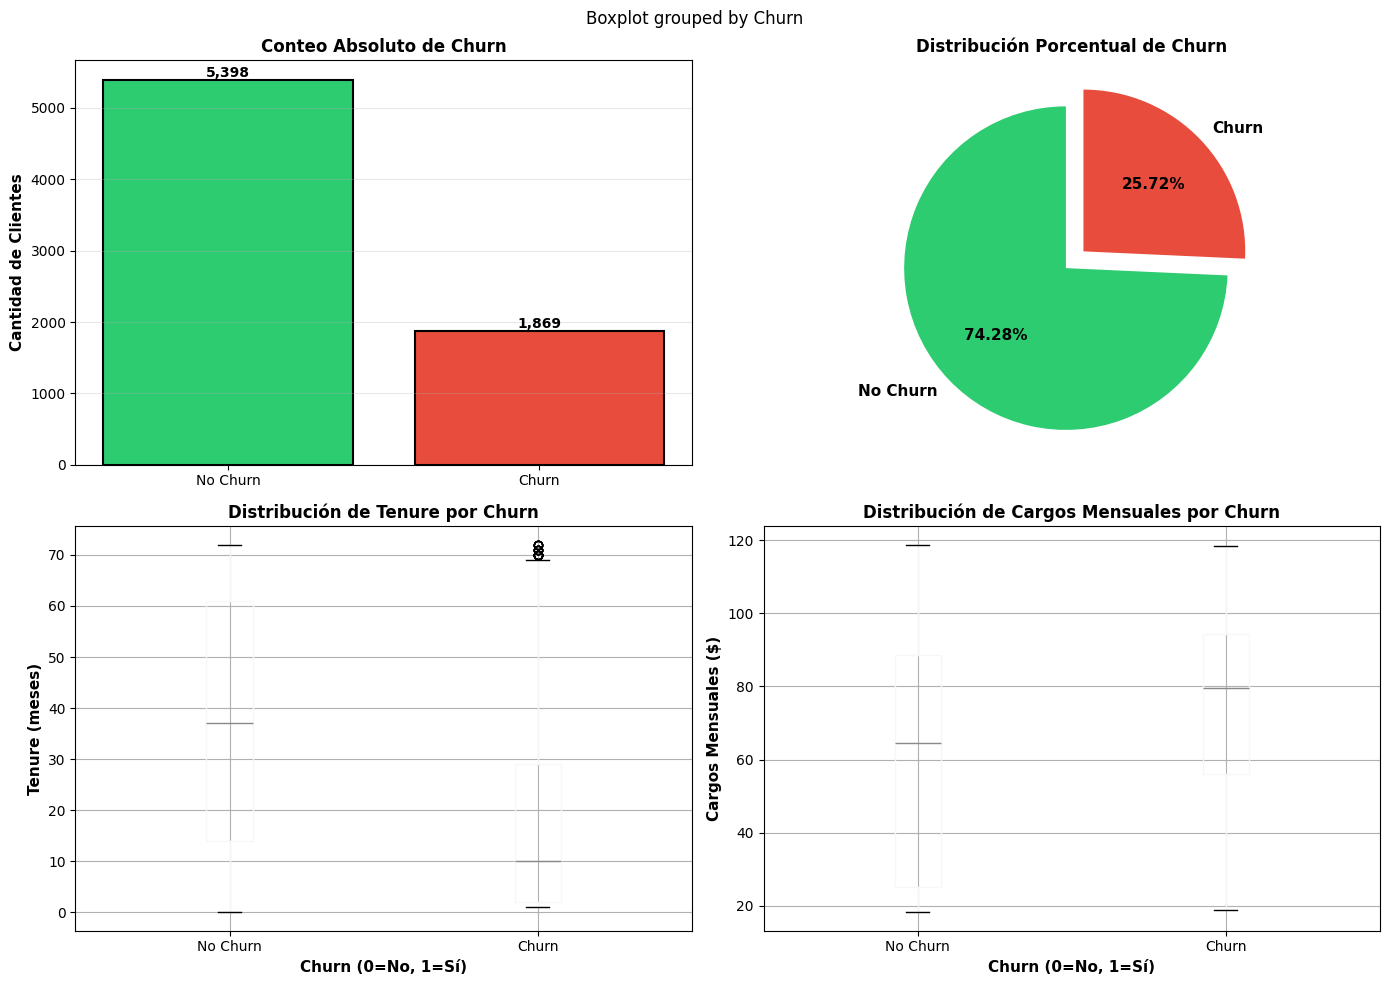

✅ Gráfico guardado: 01_distribucion_churn.png

2️⃣ CREANDO GRÁFICO: ANÁLISIS DEMOGRÁFICO
--------------------------------------------------------------------------------


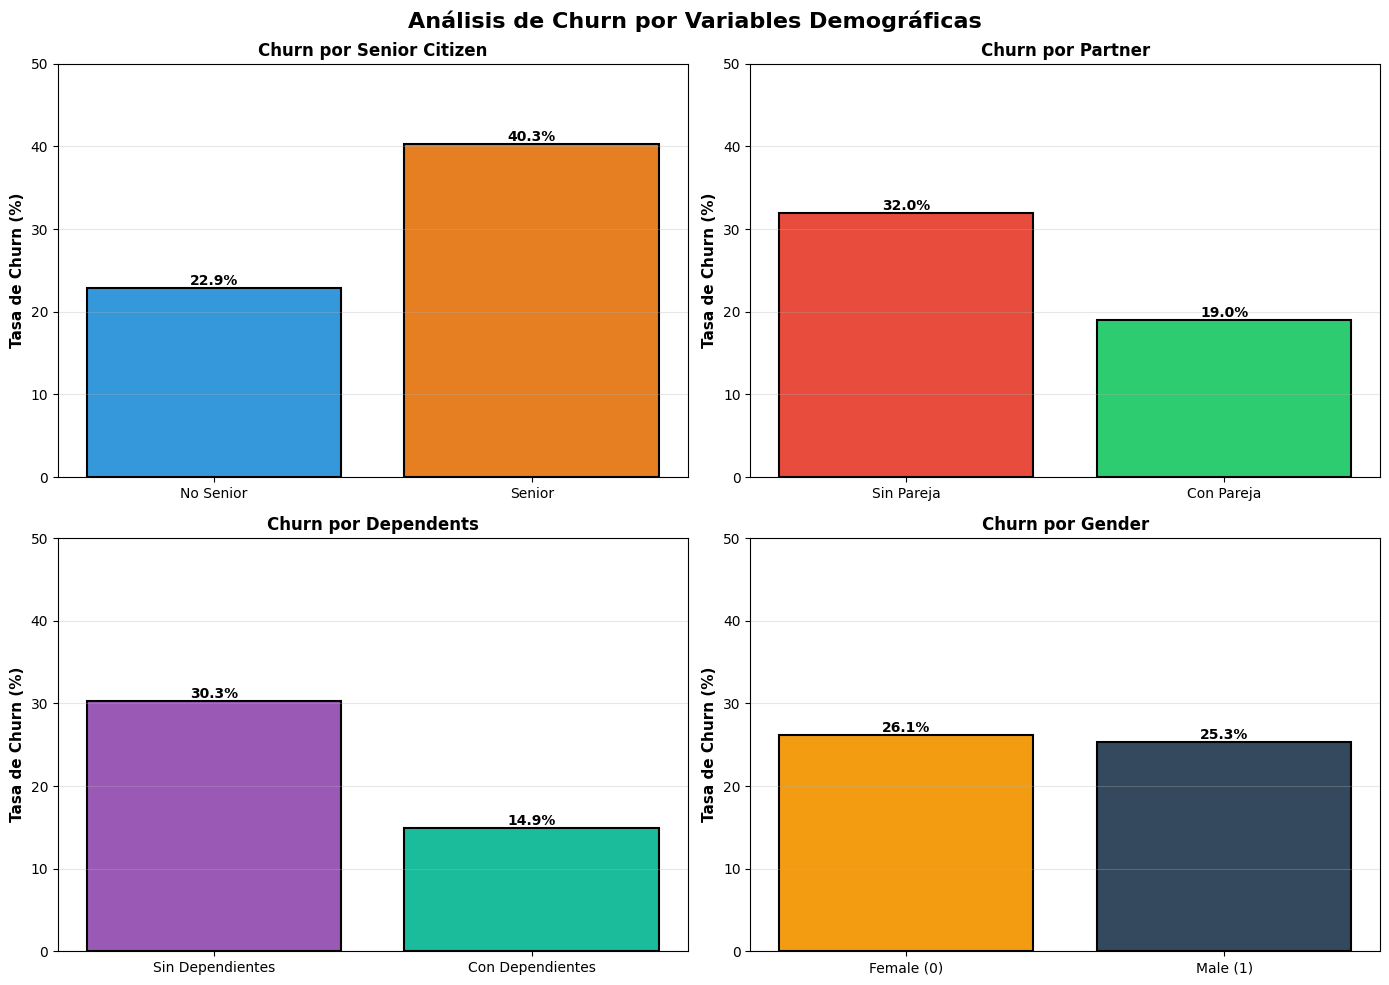

✅ Gráfico guardado: 02_analisis_demografico.png

3️⃣ CREANDO GRÁFICO: CORRELACIÓN CON CHURN
--------------------------------------------------------------------------------


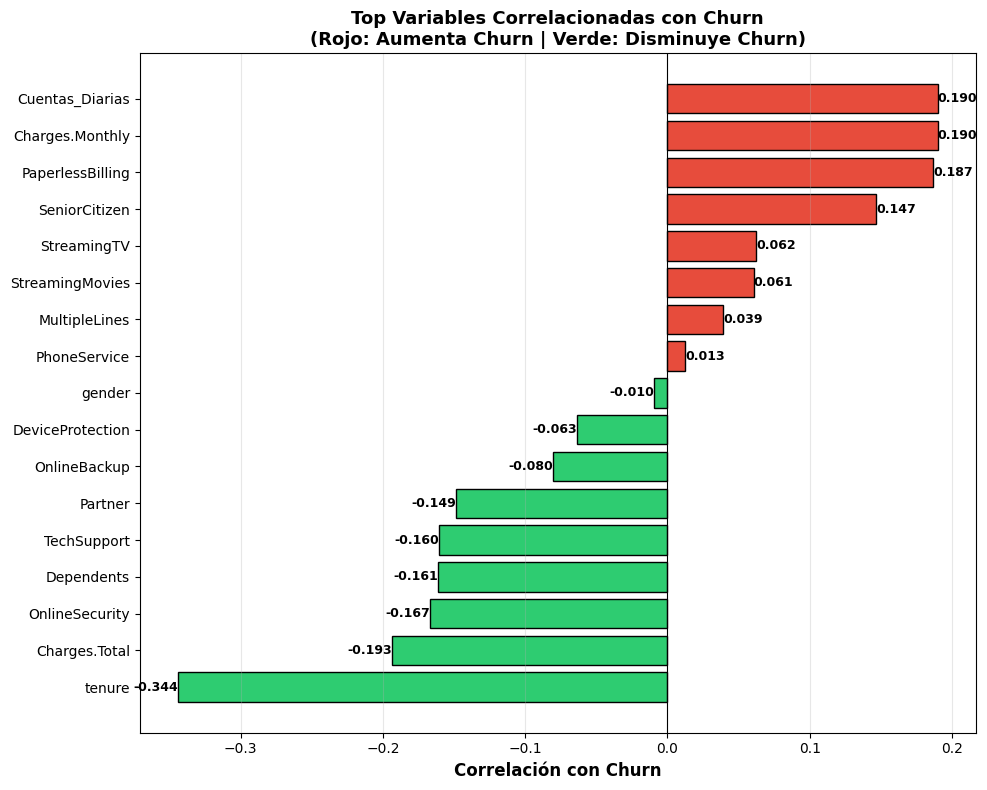

✅ Gráfico guardado: 03_correlacion_churn.png

✅ VISUALIZACIONES COMPLETADAS


In [9]:
# ============================================
# PASO 3b: DISTRIBUCIÓN DE EVASIÓN
# ============================================

import matplotlib.pyplot as plt
import seaborn as sns

print("=" * 80)
print("📊 VISUALIZACIONES: DISTRIBUCIÓN DE EVASIÓN (CHURN)")
print("=" * 80)

# Configurar estilo
plt.style.use('default')
sns.set_palette("husl")

# 1. GRÁFICO DE DISTRIBUCIÓN DE CHURN
print("\n1️⃣ CREANDO GRÁFICO: DISTRIBUCIÓN DE CHURN")
print("-" * 80)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Análisis de Distribución de Churn', fontsize=16, fontweight='bold')

# Subplot 1: Conteo absoluto
ax1 = axes[0, 0]
churn_counts = df_transformado['Churn'].value_counts()
colors_churn = ['#2ecc71', '#e74c3c']
bars1 = ax1.bar(['No Churn', 'Churn'], churn_counts.values, color=colors_churn, edgecolor='black', linewidth=1.5)
ax1.set_ylabel('Cantidad de Clientes', fontsize=11, fontweight='bold')
ax1.set_title('Conteo Absoluto de Churn', fontsize=12, fontweight='bold')
ax1.grid(axis='y', alpha=0.3)
# Agregar valores en las barras
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height):,}',
             ha='center', va='bottom', fontweight='bold')

# Subplot 2: Porcentaje
ax2 = axes[0, 1]
churn_pct = df_transformado['Churn'].value_counts(normalize=True) * 100
explode = (0.05, 0.1)
wedges, texts, autotexts = ax2.pie(churn_pct.values,
                                     labels=['No Churn', 'Churn'],
                                     autopct='%1.2f%%',
                                     colors=colors_churn,
                                     explode=explode,
                                     startangle=90,
                                     textprops={'fontsize': 11, 'fontweight': 'bold'})
ax2.set_title('Distribución Porcentual de Churn', fontsize=12, fontweight='bold')

# Subplot 3: Tenure por Churn
ax3 = axes[1, 0]
df_transformado.boxplot(column='tenure', by='Churn', ax=ax3)
ax3.set_xlabel('Churn (0=No, 1=Sí)', fontsize=11, fontweight='bold')
ax3.set_ylabel('Tenure (meses)', fontsize=11, fontweight='bold')
ax3.set_title('Distribución de Tenure por Churn', fontsize=12, fontweight='bold')
plt.sca(ax3)
plt.xticks([1, 2], ['No Churn', 'Churn'])

# Subplot 4: Charges.Monthly por Churn
ax4 = axes[1, 1]
df_transformado.boxplot(column='Charges.Monthly', by='Churn', ax=ax4)
ax4.set_xlabel('Churn (0=No, 1=Sí)', fontsize=11, fontweight='bold')
ax4.set_ylabel('Cargos Mensuales ($)', fontsize=11, fontweight='bold')
ax4.set_title('Distribución de Cargos Mensuales por Churn', fontsize=12, fontweight='bold')
plt.sca(ax4)
plt.xticks([1, 2], ['No Churn', 'Churn'])

plt.tight_layout()
plt.savefig('01_distribucion_churn.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Gráfico guardado: 01_distribucion_churn.png")

# 2. GRÁFICO DE VARIABLES DEMOGRÁFICAS
print("\n2️⃣ CREANDO GRÁFICO: ANÁLISIS DEMOGRÁFICO")
print("-" * 80)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Análisis de Churn por Variables Demográficas', fontsize=16, fontweight='bold')

# Senior Citizen
ax1 = axes[0, 0]
senior_churn = df_transformado.groupby('SeniorCitizen')['Churn'].agg(['count', 'sum'])
senior_churn['pct'] = (senior_churn['sum'] / senior_churn['count'] * 100)
bars = ax1.bar(['No Senior', 'Senior'], senior_churn['pct'].values, color=['#3498db', '#e67e22'], edgecolor='black', linewidth=1.5)
ax1.set_ylabel('Tasa de Churn (%)', fontsize=11, fontweight='bold')
ax1.set_title('Churn por Senior Citizen', fontsize=12, fontweight='bold')
ax1.set_ylim([0, 50])
ax1.grid(axis='y', alpha=0.3)
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}%',
             ha='center', va='bottom', fontweight='bold')

# Partner
ax2 = axes[0, 1]
partner_churn = df_transformado.groupby('Partner')['Churn'].agg(['count', 'sum'])
partner_churn['pct'] = (partner_churn['sum'] / partner_churn['count'] * 100)
bars = ax2.bar(['Sin Pareja', 'Con Pareja'], partner_churn['pct'].values, color=['#e74c3c', '#2ecc71'], edgecolor='black', linewidth=1.5)
ax2.set_ylabel('Tasa de Churn (%)', fontsize=11, fontweight='bold')
ax2.set_title('Churn por Partner', fontsize=12, fontweight='bold')
ax2.set_ylim([0, 50])
ax2.grid(axis='y', alpha=0.3)
for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}%',
             ha='center', va='bottom', fontweight='bold')

# Dependents
ax3 = axes[1, 0]
dependents_churn = df_transformado.groupby('Dependents')['Churn'].agg(['count', 'sum'])
dependents_churn['pct'] = (dependents_churn['sum'] / dependents_churn['count'] * 100)
bars = ax3.bar(['Sin Dependientes', 'Con Dependientes'], dependents_churn['pct'].values, color=['#9b59b6', '#1abc9c'], edgecolor='black', linewidth=1.5)
ax3.set_ylabel('Tasa de Churn (%)', fontsize=11, fontweight='bold')
ax3.set_title('Churn por Dependents', fontsize=12, fontweight='bold')
ax3.set_ylim([0, 50])
ax3.grid(axis='y', alpha=0.3)
for bar in bars:
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}%',
             ha='center', va='bottom', fontweight='bold')

# Gender
ax4 = axes[1, 1]
gender_churn = df_transformado.groupby('gender')['Churn'].agg(['count', 'sum'])
gender_churn['pct'] = (gender_churn['sum'] / gender_churn['count'] * 100)
bars = ax4.bar(['Female (0)', 'Male (1)'], gender_churn['pct'].values, color=['#f39c12', '#34495e'], edgecolor='black', linewidth=1.5)
ax4.set_ylabel('Tasa de Churn (%)', fontsize=11, fontweight='bold')
ax4.set_title('Churn por Gender', fontsize=12, fontweight='bold')
ax4.set_ylim([0, 50])
ax4.grid(axis='y', alpha=0.3)
for bar in bars:
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}%',
             ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig('02_analisis_demografico.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Gráfico guardado: 02_analisis_demografico.png")

# 3. GRÁFICO DE CORRELACIÓN
print("\n3️⃣ CREANDO GRÁFICO: CORRELACIÓN CON CHURN")
print("-" * 80)

fig, ax = plt.subplots(figsize=(10, 8))

df_numerico = df_transformado.select_dtypes(include=['int64', 'float64'])
correlacion_churn = df_numerico.corr()['Churn'].sort_values()

# Eliminar Churn consigo mismo
correlacion_churn = correlacion_churn[correlacion_churn.index != 'Churn']

# Crear colores
colors = ['#e74c3c' if x > 0 else '#2ecc71' for x in correlacion_churn.values]

bars = ax.barh(range(len(correlacion_churn)), correlacion_churn.values, color=colors, edgecolor='black', linewidth=1)
ax.set_yticks(range(len(correlacion_churn)))
ax.set_yticklabels(correlacion_churn.index, fontsize=10)
ax.set_xlabel('Correlación con Churn', fontsize=12, fontweight='bold')
ax.set_title('Top Variables Correlacionadas con Churn\n(Rojo: Aumenta Churn | Verde: Disminuye Churn)',
             fontsize=13, fontweight='bold')
ax.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
ax.grid(axis='x', alpha=0.3)

# Agregar valores en las barras
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height()/2.,
            f'{width:.3f}',
            ha='left' if width > 0 else 'right',
            va='center',
            fontweight='bold',
            fontsize=9)

plt.tight_layout()
plt.savefig('03_correlacion_churn.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Gráfico guardado: 03_correlacion_churn.png")

print("\n" + "=" * 80)
print("✅ VISUALIZACIONES COMPLETADAS")
print("=" * 80)

📊 ANÁLISIS DE CHURN POR VARIABLES CATEGÓRICAS

1️⃣ ANÁLISIS DE SERVICIOS:
--------------------------------------------------------------------------------

🌐 InternetService:
        count   sum   mean     pct
No DSL   4779  1410  0.295  29.504
DSL      2488   459  0.184  18.449

📡 Fiber Optic:
             count   sum   mean     pct
No Fiber      4069   572  0.141  14.058
Fiber optic   3198  1297  0.406  40.557

☎️ PhoneService:
               count   sum   mean     pct
No Phone         707   170  0.240  24.045
Phone Service   6560  1699  0.259  25.899

2️⃣ ANÁLISIS DE SERVICIOS ADICIONALES:
--------------------------------------------------------------------------------

📌 Online Security:
                     count   sum    pct
Sin Online Security   5189  1574  30.33
Con Online Security   2078   295  14.20

📌 Online Backup:
                   count   sum    pct
Sin Online Backup   4763  1346  28.26
Con Online Backup   2504   523  20.89

📌 Device Protection:
                       co

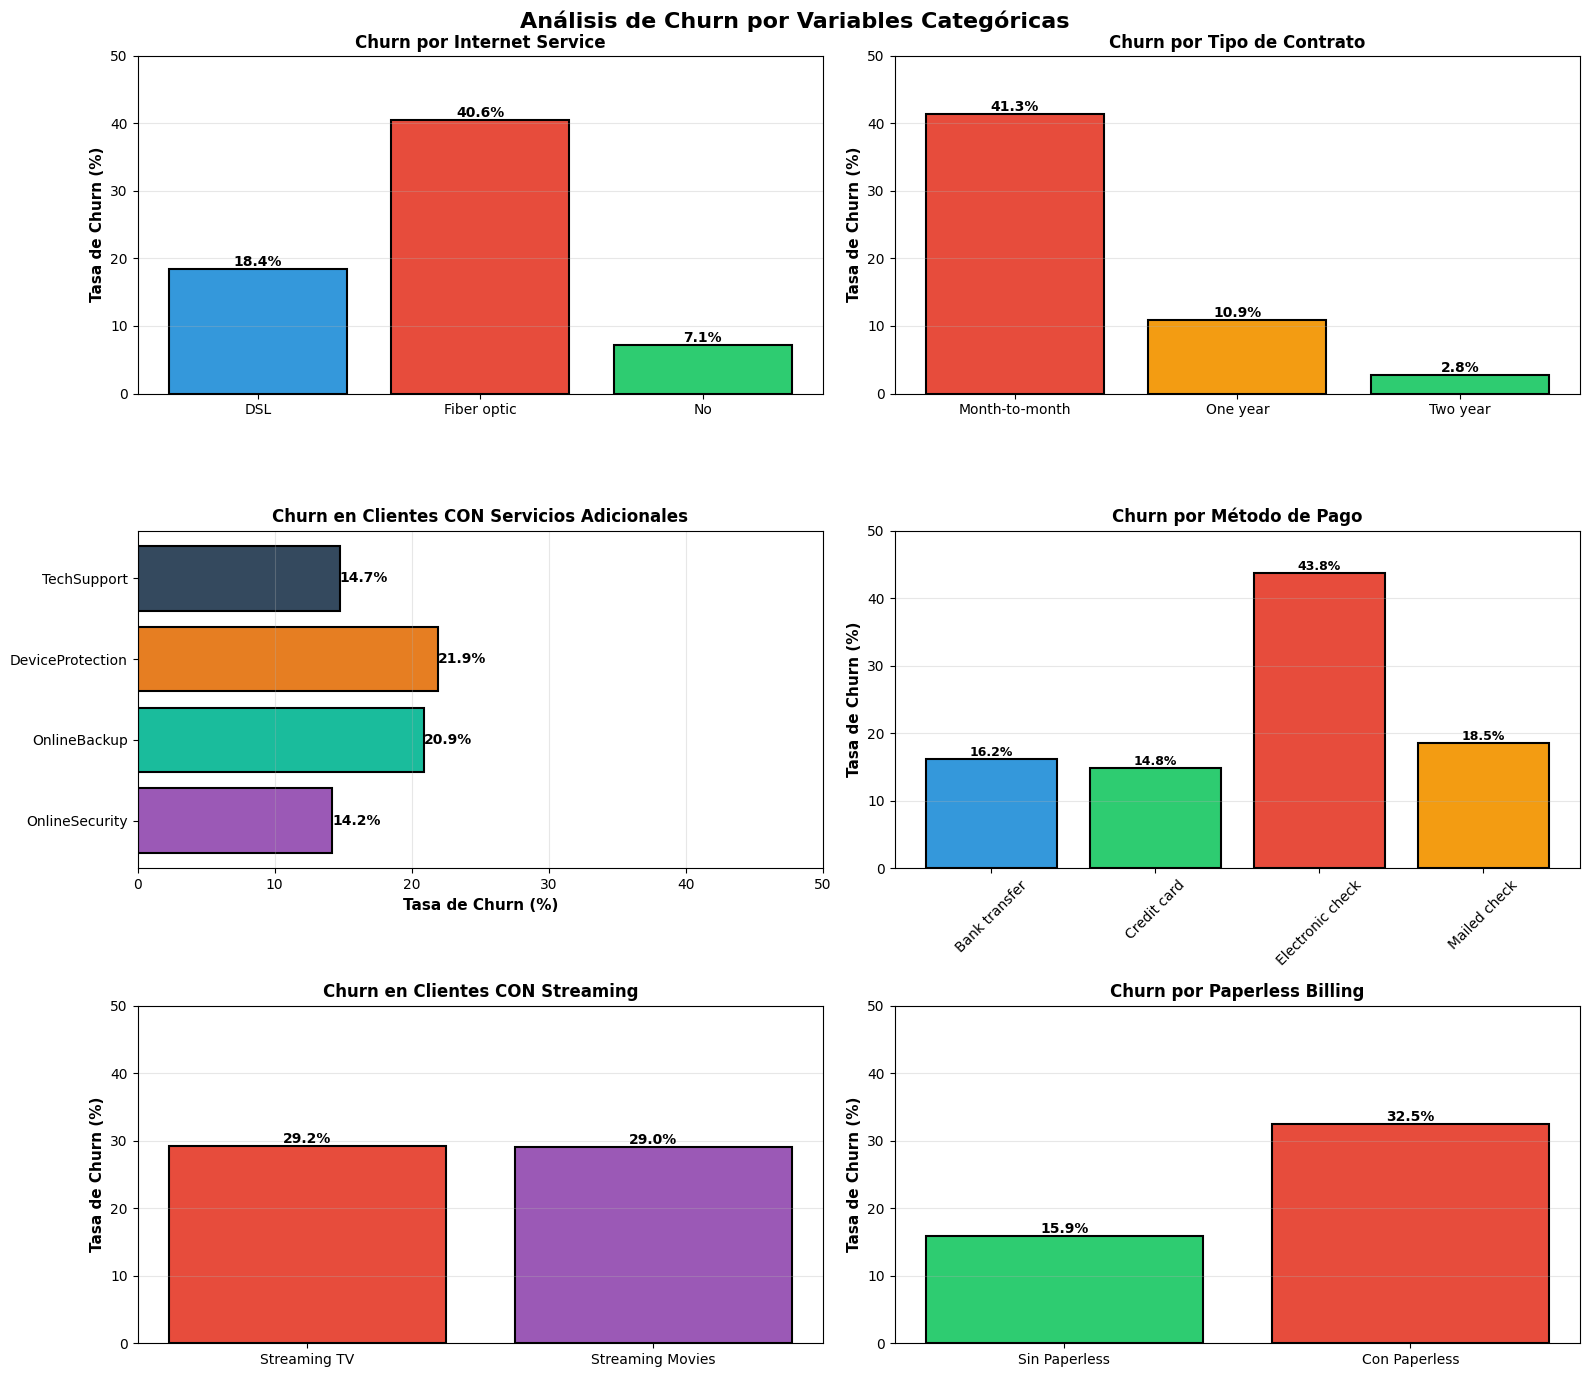

✅ Gráfico guardado: 04_churn_categoricas.png

✅ ANÁLISIS POR VARIABLES CATEGÓRICAS COMPLETADO


In [10]:
# ============================================
# PASO 3c: RECUENTO DE CHURN POR VARIABLES CATEGÓRICAS
# ============================================

import matplotlib.pyplot as plt
import seaborn as sns

print("=" * 80)
print("📊 ANÁLISIS DE CHURN POR VARIABLES CATEGÓRICAS")
print("=" * 80)

# 1. ANÁLISIS DE SERVICIOS (Internet, Phone, Adicionales)
print("\n1️⃣ ANÁLISIS DE SERVICIOS:")
print("-" * 80)

# InternetService
print("\n🌐 InternetService:")
internet_churn = df_transformado.groupby('InternetService_DSL')['Churn'].agg(['count', 'sum', 'mean'])
internet_churn['pct'] = internet_churn['mean'] * 100
internet_churn.index = ['No DSL', 'DSL']
print(internet_churn.round(3))

print("\n📡 Fiber Optic:")
fiber_churn = df_transformado.groupby('InternetService_Fiber optic')['Churn'].agg(['count', 'sum', 'mean'])
fiber_churn['pct'] = fiber_churn['mean'] * 100
fiber_churn.index = ['No Fiber', 'Fiber optic']
print(fiber_churn.round(3))

# Phone Service
print("\n☎️ PhoneService:")
phone_churn = df_transformado.groupby('PhoneService')['Churn'].agg(['count', 'sum', 'mean'])
phone_churn['pct'] = phone_churn['mean'] * 100
phone_churn.index = ['No Phone', 'Phone Service']
print(phone_churn.round(3))

# 2. ANÁLISIS DE SERVICIOS ADICIONALES
print("\n" + "=" * 80)
print("2️⃣ ANÁLISIS DE SERVICIOS ADICIONALES:")
print("-" * 80)

servicios_adicionales = {
    'OnlineSecurity': 'Online Security',
    'OnlineBackup': 'Online Backup',
    'DeviceProtection': 'Device Protection',
    'TechSupport': 'Tech Support',
    'StreamingTV': 'Streaming TV',
    'StreamingMovies': 'Streaming Movies'
}

for col, label in servicios_adicionales.items():
    servicio_churn = df_transformado.groupby(col)['Churn'].agg(['count', 'sum', 'mean'])
    servicio_churn['pct'] = servicio_churn['mean'] * 100
    servicio_churn.index = ['Sin ' + label, 'Con ' + label]
    print(f"\n📌 {label}:")
    print(servicio_churn[['count', 'sum', 'pct']].round(2))

# 3. ANÁLISIS DE CONTRATO
print("\n" + "=" * 80)
print("3️⃣ ANÁLISIS DE TIPO DE CONTRATO:")
print("-" * 80)

contratos = {
    'Contract_Month-to-month': 'Month-to-month',
    'Contract_One year': 'One year',
    'Contract_Two year': 'Two year'
}

for col, label in contratos.items():
    contrato_churn = df_transformado.groupby(col)['Churn'].agg(['count', 'sum', 'mean'])
    contrato_churn['pct'] = contrato_churn['mean'] * 100
    contrato_churn.index = ['No ' + label, label]
    print(f"\n📋 {label}:")
    print(contrato_churn[['count', 'sum', 'pct']].round(2))

# 4. ANÁLISIS DE MÉTODO DE PAGO
print("\n" + "=" * 80)
print("4️⃣ ANÁLISIS DE MÉTODO DE PAGO:")
print("-" * 80)

metodos_pago = {
    'PaymentMethod_Bank transfer (automatic)': 'Bank transfer (automatic)',
    'PaymentMethod_Credit card (automatic)': 'Credit card (automatic)',
    'PaymentMethod_Electronic check': 'Electronic check',
    'PaymentMethod_Mailed check': 'Mailed check'
}

for col, label in metodos_pago.items():
    pago_churn = df_transformado.groupby(col)['Churn'].agg(['count', 'sum', 'mean'])
    pago_churn['pct'] = pago_churn['mean'] * 100
    pago_churn.index = ['No ' + label, label]
    print(f"\n💳 {label}:")
    print(pago_churn[['count', 'sum', 'pct']].round(2))

# 5. VISUALIZACIÓN GRÁFICA
print("\n" + "=" * 80)
print("5️⃣ CREANDO VISUALIZACIONES:")
print("-" * 80)

fig, axes = plt.subplots(3, 2, figsize=(16, 14))
fig.suptitle('Análisis de Churn por Variables Categóricas', fontsize=16, fontweight='bold')

# Gráfico 1: Servicios de Internet
ax1 = axes[0, 0]
internet_data = []
internet_labels = []
for col in ['InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No']:
    churn_rate = (df_transformado[df_transformado[col] == True]['Churn'].mean() * 100)
    label = col.replace('InternetService_', '')
    internet_data.append(churn_rate)
    internet_labels.append(label)

bars = ax1.bar(internet_labels, internet_data, color=['#3498db', '#e74c3c', '#2ecc71'], edgecolor='black', linewidth=1.5)
ax1.set_ylabel('Tasa de Churn (%)', fontsize=11, fontweight='bold')
ax1.set_title('Churn por Internet Service', fontsize=12, fontweight='bold')
ax1.set_ylim([0, 50])
ax1.grid(axis='y', alpha=0.3)
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}%', ha='center', va='bottom', fontweight='bold')

# Gráfico 2: Tipo de Contrato
ax2 = axes[0, 1]
contract_data = []
contract_labels = []
for col in ['Contract_Month-to-month', 'Contract_One year', 'Contract_Two year']:
    churn_rate = (df_transformado[df_transformado[col] == True]['Churn'].mean() * 100)
    label = col.replace('Contract_', '')
    contract_data.append(churn_rate)
    contract_labels.append(label)

bars = ax2.bar(contract_labels, contract_data, color=['#e74c3c', '#f39c12', '#2ecc71'], edgecolor='black', linewidth=1.5)
ax2.set_ylabel('Tasa de Churn (%)', fontsize=11, fontweight='bold')
ax2.set_title('Churn por Tipo de Contrato', fontsize=12, fontweight='bold')
ax2.set_ylim([0, 50])
ax2.grid(axis='y', alpha=0.3)
for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}%', ha='center', va='bottom', fontweight='bold')

# Gráfico 3: Servicios Adicionales (Online Security, Tech Support, etc.)
ax3 = axes[1, 0]
servicios_data = []
servicios_labels = []
for col in ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']:
    churn_rate = (df_transformado[df_transformado[col] == 1]['Churn'].mean() * 100)
    label = col
    servicios_data.append(churn_rate)
    servicios_labels.append(label)

bars = ax3.barh(servicios_labels, servicios_data, color=['#9b59b6', '#1abc9c', '#e67e22', '#34495e'], edgecolor='black', linewidth=1.5)
ax3.set_xlabel('Tasa de Churn (%)', fontsize=11, fontweight='bold')
ax3.set_title('Churn en Clientes CON Servicios Adicionales', fontsize=12, fontweight='bold')
ax3.set_xlim([0, 50])
ax3.grid(axis='x', alpha=0.3)
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax3.text(width, bar.get_y() + bar.get_height()/2.,
             f'{width:.1f}%', ha='left', va='center', fontweight='bold')

# Gráfico 4: Métodos de Pago
ax4 = axes[1, 1]
pago_data = []
pago_labels = []
for col in ['PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)',
            'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']:
    churn_rate = (df_transformado[df_transformado[col] == True]['Churn'].mean() * 100)
    label = col.replace('PaymentMethod_', '').replace(' (automatic)', '')
    pago_data.append(churn_rate)
    pago_labels.append(label)

bars = ax4.bar(pago_labels, pago_data, color=['#3498db', '#2ecc71', '#e74c3c', '#f39c12'], edgecolor='black', linewidth=1.5)
ax4.set_ylabel('Tasa de Churn (%)', fontsize=11, fontweight='bold')
ax4.set_title('Churn por Método de Pago', fontsize=12, fontweight='bold')
ax4.set_ylim([0, 50])
ax4.tick_params(axis='x', rotation=45)
ax4.grid(axis='y', alpha=0.3)
for bar in bars:
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}%', ha='center', va='bottom', fontweight='bold', fontsize=9)

# Gráfico 5: Streaming Services
ax5 = axes[2, 0]
streaming_data = []
streaming_labels = ['Streaming TV', 'Streaming Movies']
for col in ['StreamingTV', 'StreamingMovies']:
    churn_rate = (df_transformado[df_transformado[col] == 1]['Churn'].mean() * 100)
    streaming_data.append(churn_rate)

bars = ax5.bar(streaming_labels, streaming_data, color=['#e74c3c', '#9b59b6'], edgecolor='black', linewidth=1.5)
ax5.set_ylabel('Tasa de Churn (%)', fontsize=11, fontweight='bold')
ax5.set_title('Churn en Clientes CON Streaming', fontsize=12, fontweight='bold')
ax5.set_ylim([0, 50])
ax5.grid(axis='y', alpha=0.3)
for bar in bars:
    height = bar.get_height()
    ax5.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}%', ha='center', va='bottom', fontweight='bold')

# Gráfico 6: Paperless Billing
ax6 = axes[2, 1]
paperless_data = []
paperless_labels = ['Sin Paperless', 'Con Paperless']
churn_no_paperless = (df_transformado[df_transformado['PaperlessBilling'] == 0]['Churn'].mean() * 100)
churn_paperless = (df_transformado[df_transformado['PaperlessBilling'] == 1]['Churn'].mean() * 100)
paperless_data = [churn_no_paperless, churn_paperless]

bars = ax6.bar(paperless_labels, paperless_data, color=['#2ecc71', '#e74c3c'], edgecolor='black', linewidth=1.5)
ax6.set_ylabel('Tasa de Churn (%)', fontsize=11, fontweight='bold')
ax6.set_title('Churn por Paperless Billing', fontsize=12, fontweight='bold')
ax6.set_ylim([0, 50])
ax6.grid(axis='y', alpha=0.3)
for bar in bars:
    height = bar.get_height()
    ax6.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig('04_churn_categoricas.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Gráfico guardado: 04_churn_categoricas.png")

print("\n" + "=" * 80)
print("✅ ANÁLISIS POR VARIABLES CATEGÓRICAS COMPLETADO")
print("=" * 80)

📊 ANÁLISIS DE CHURN POR VARIABLES NUMÉRICAS

1️⃣ ANÁLISIS DE TENURE (ANTIGÜEDAD DEL CLIENTE):
--------------------------------------------------------------------------------
      tenure                             
       count   mean median    std min max
Churn                                    
0       5398  37.32   37.0  24.18   0  72
1       1869  17.98   10.0  19.53   1  72

📊 Churn por rango de Tenure:
             count  sum  mean    pct
tenure_bin                          
0-6 meses     1525  784  0.51  51.41
6-12 meses     729  253  0.35  34.71
12-24 meses   1045  294  0.28  28.13
24-36 meses    863  180  0.21  20.86
36-48 meses    785  145  0.18  18.47
48-72 meses   2309  213  0.09   9.22

2️⃣ ANÁLISIS DE CHARGES.MONTHLY (CARGOS MENSUALES):
      Charges.Monthly                                    
                count   mean median    std    min     max
Churn                                                    
0                5398  61.35  64.50  31.11  18.25  118.75
1   

/tmp/ipython-input-2871963799.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tenure_churn = df_transformado.groupby('tenure_bin')['Churn'].agg(['count', 'sum', 'mean'])
/tmp/ipython-input-2871963799.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  charges_churn = df_transformado.groupby('charges_bin')['Churn'].agg(['count', 'sum', 'mean'])
/tmp/ipython-input-2871963799.py:61: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this 

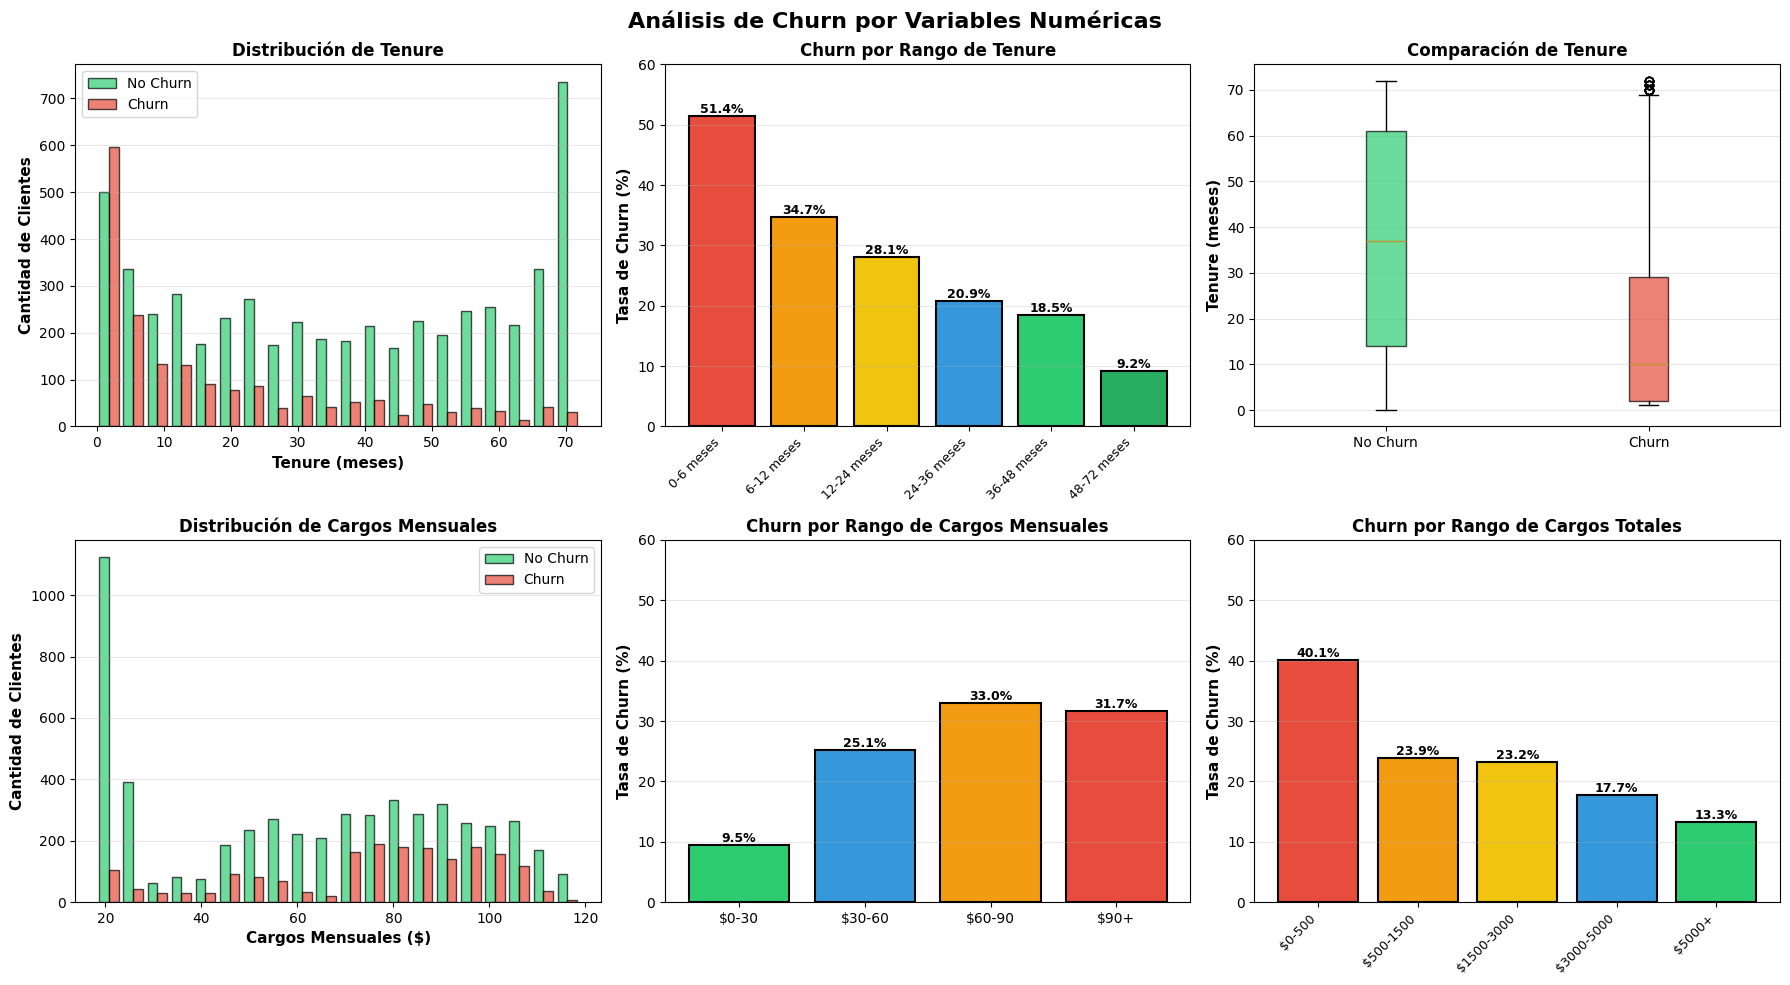

✅ Gráfico guardado: 05_churn_numericas.png

5️⃣ ANÁLISIS DE RELACIONES ENTRE VARIABLES:
--------------------------------------------------------------------------------


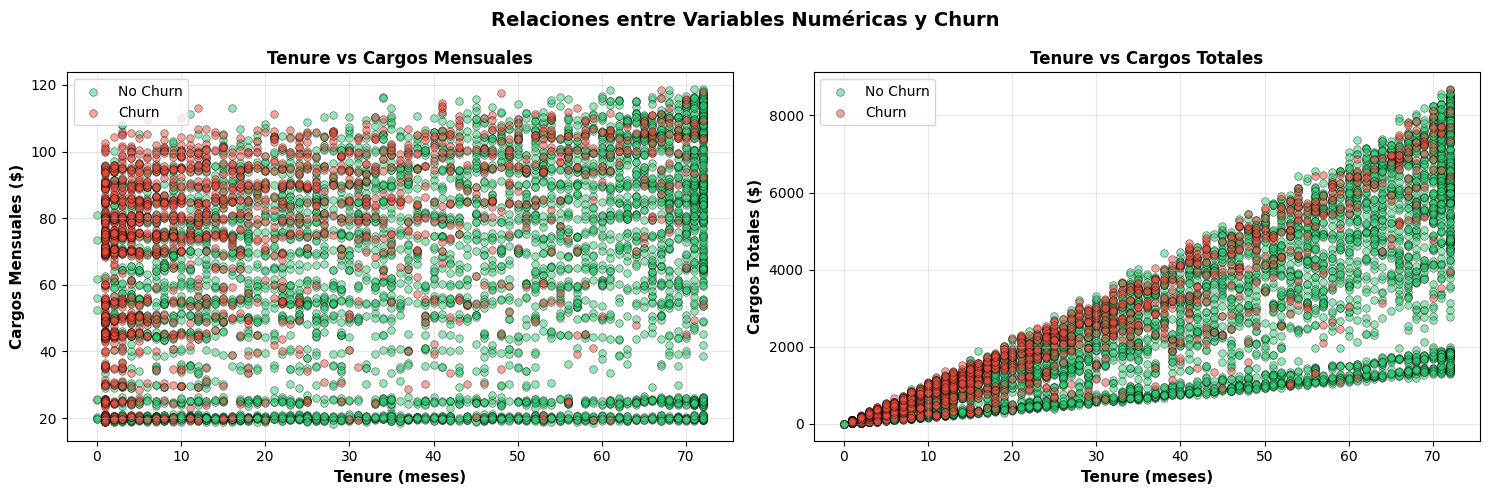

✅ Gráfico guardado: 06_scatter_churn.png

✅ ANÁLISIS POR VARIABLES NUMÉRICAS COMPLETADO


In [11]:
# ============================================
# PASO 3d: ANÁLISIS DE CHURN POR VARIABLES NUMÉRICAS
# ============================================

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

print("=" * 80)
print("📊 ANÁLISIS DE CHURN POR VARIABLES NUMÉRICAS")
print("=" * 80)

# 1. ANÁLISIS DE TENURE
print("\n1️⃣ ANÁLISIS DE TENURE (ANTIGÜEDAD DEL CLIENTE):")
print("-" * 80)

tenure_analysis = df_transformado.groupby('Churn')[['tenure']].agg(['count', 'mean', 'median', 'std', 'min', 'max'])
print(tenure_analysis.round(2))

# Crear bins de tenure para análisis más detallado
tenure_bins = [0, 6, 12, 24, 36, 48, 72]
tenure_labels = ['0-6 meses', '6-12 meses', '12-24 meses', '24-36 meses', '36-48 meses', '48-72 meses']
df_transformado['tenure_bin'] = pd.cut(df_transformado['tenure'], bins=tenure_bins, labels=tenure_labels)

tenure_churn = df_transformado.groupby('tenure_bin')['Churn'].agg(['count', 'sum', 'mean'])
tenure_churn['pct'] = tenure_churn['mean'] * 100
print("\n📊 Churn por rango de Tenure:")
print(tenure_churn.round(2))

# 2. ANÁLISIS DE CHARGES.MONTHLY
print("\n" + "=" * 80)
print("2️⃣ ANÁLISIS DE CHARGES.MONTHLY (CARGOS MENSUALES):")
print("=" * 80)

charges_analysis = df_transformado.groupby('Churn')[['Charges.Monthly']].agg(['count', 'mean', 'median', 'std', 'min', 'max'])
print(charges_analysis.round(2))

# Crear bins de charges
charges_bins = [0, 30, 60, 90, 120]
charges_labels = ['$0-30', '$30-60', '$60-90', '$90+']
df_transformado['charges_bin'] = pd.cut(df_transformado['Charges.Monthly'], bins=charges_bins, labels=charges_labels)

charges_churn = df_transformado.groupby('charges_bin')['Churn'].agg(['count', 'sum', 'mean'])
charges_churn['pct'] = charges_churn['mean'] * 100
print("\n📊 Churn por rango de Cargos Mensuales:")
print(charges_churn.round(2))

# 3. ANÁLISIS DE CHARGES.TOTAL
print("\n" + "=" * 80)
print("3️⃣ ANÁLISIS DE CHARGES.TOTAL (CARGOS TOTALES):")
print("=" * 80)

total_analysis = df_transformado.groupby('Churn')[['Charges.Total']].agg(['count', 'mean', 'median', 'std', 'min', 'max'])
print(total_analysis.round(2))

# Crear bins de total charges
total_bins = [0, 500, 1500, 3000, 5000, 9000]
total_labels = ['$0-500', '$500-1500', '$1500-3000', '$3000-5000', '$5000+']
df_transformado['total_bin'] = pd.cut(df_transformado['Charges.Total'], bins=total_bins, labels=total_labels)

total_churn = df_transformado.groupby('total_bin')['Churn'].agg(['count', 'sum', 'mean'])
total_churn['pct'] = total_churn['mean'] * 100
print("\n📊 Churn por rango de Cargos Totales:")
print(total_churn.round(2))

# 4. VISUALIZACIONES
print("\n" + "=" * 80)
print("4️⃣ CREANDO VISUALIZACIONES:")
print("-" * 80)

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Análisis de Churn por Variables Numéricas', fontsize=16, fontweight='bold')

# Gráfico 1: Distribución de Tenure
ax1 = axes[0, 0]
tenure_data_no_churn = df_transformado[df_transformado['Churn'] == 0]['tenure']
tenure_data_churn = df_transformado[df_transformado['Churn'] == 1]['tenure']
ax1.hist([tenure_data_no_churn, tenure_data_churn], label=['No Churn', 'Churn'],
         bins=20, color=['#2ecc71', '#e74c3c'], alpha=0.7, edgecolor='black')
ax1.set_xlabel('Tenure (meses)', fontsize=11, fontweight='bold')
ax1.set_ylabel('Cantidad de Clientes', fontsize=11, fontweight='bold')
ax1.set_title('Distribución de Tenure', fontsize=12, fontweight='bold')
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

# Gráfico 2: Churn por rango de Tenure
ax2 = axes[0, 1]
bars = ax2.bar(range(len(tenure_churn)), tenure_churn['pct'].values,
               color=['#e74c3c', '#f39c12', '#f1c40f', '#3498db', '#2ecc71', '#27ae60'],
               edgecolor='black', linewidth=1.5)
ax2.set_xticks(range(len(tenure_churn)))
ax2.set_xticklabels(tenure_churn.index, rotation=45, ha='right', fontsize=9)
ax2.set_ylabel('Tasa de Churn (%)', fontsize=11, fontweight='bold')
ax2.set_title('Churn por Rango de Tenure', fontsize=12, fontweight='bold')
ax2.set_ylim([0, 60])
ax2.grid(axis='y', alpha=0.3)
for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}%', ha='center', va='bottom', fontweight='bold', fontsize=9)

# Gráfico 3: Boxplot de Tenure
ax3 = axes[0, 2]
bp = ax3.boxplot([tenure_data_no_churn, tenure_data_churn],
                   labels=['No Churn', 'Churn'],
                   patch_artist=True)
for patch, color in zip(bp['boxes'], ['#2ecc71', '#e74c3c']):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
ax3.set_ylabel('Tenure (meses)', fontsize=11, fontweight='bold')
ax3.set_title('Comparación de Tenure', fontsize=12, fontweight='bold')
ax3.grid(axis='y', alpha=0.3)

# Gráfico 4: Distribución de Charges.Monthly
ax4 = axes[1, 0]
charges_data_no_churn = df_transformado[df_transformado['Churn'] == 0]['Charges.Monthly']
charges_data_churn = df_transformado[df_transformado['Churn'] == 1]['Charges.Monthly']
ax4.hist([charges_data_no_churn, charges_data_churn], label=['No Churn', 'Churn'],
         bins=20, color=['#2ecc71', '#e74c3c'], alpha=0.7, edgecolor='black')
ax4.set_xlabel('Cargos Mensuales ($)', fontsize=11, fontweight='bold')
ax4.set_ylabel('Cantidad de Clientes', fontsize=11, fontweight='bold')
ax4.set_title('Distribución de Cargos Mensuales', fontsize=12, fontweight='bold')
ax4.legend()
ax4.grid(axis='y', alpha=0.3)

# Gráfico 5: Churn por rango de Charges.Monthly
ax5 = axes[1, 1]
bars = ax5.bar(range(len(charges_churn)), charges_churn['pct'].values,
               color=['#2ecc71', '#3498db', '#f39c12', '#e74c3c'],
               edgecolor='black', linewidth=1.5)
ax5.set_xticks(range(len(charges_churn)))
ax5.set_xticklabels(charges_churn.index, rotation=0, fontsize=10)
ax5.set_ylabel('Tasa de Churn (%)', fontsize=11, fontweight='bold')
ax5.set_title('Churn por Rango de Cargos Mensuales', fontsize=12, fontweight='bold')
ax5.set_ylim([0, 60])
ax5.grid(axis='y', alpha=0.3)
for bar in bars:
    height = bar.get_height()
    ax5.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}%', ha='center', va='bottom', fontweight='bold', fontsize=9)

# Gráfico 6: Churn por rango de Charges.Total
ax6 = axes[1, 2]
bars = ax6.bar(range(len(total_churn)), total_churn['pct'].values,
               color=['#e74c3c', '#f39c12', '#f1c40f', '#3498db', '#2ecc71'],
               edgecolor='black', linewidth=1.5)
ax6.set_xticks(range(len(total_churn)))
ax6.set_xticklabels(total_churn.index, rotation=45, ha='right', fontsize=9)
ax6.set_ylabel('Tasa de Churn (%)', fontsize=11, fontweight='bold')
ax6.set_title('Churn por Rango de Cargos Totales', fontsize=12, fontweight='bold')
ax6.set_ylim([0, 60])
ax6.grid(axis='y', alpha=0.3)
for bar in bars:
    height = bar.get_height()
    ax6.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}%', ha='center', va='bottom', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.savefig('05_churn_numericas.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Gráfico guardado: 05_churn_numericas.png")

# 5. ANÁLISIS DE SCATTER (Tenure vs Charges)
print("\n" + "=" * 80)
print("5️⃣ ANÁLISIS DE RELACIONES ENTRE VARIABLES:")
print("-" * 80)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Relaciones entre Variables Numéricas y Churn', fontsize=14, fontweight='bold')

# Scatter: Tenure vs Charges.Monthly
ax1 = axes[0]
no_churn = df_transformado[df_transformado['Churn'] == 0]
churn = df_transformado[df_transformado['Churn'] == 1]
ax1.scatter(no_churn['tenure'], no_churn['Charges.Monthly'],
           alpha=0.5, s=30, color='#2ecc71', label='No Churn', edgecolors='black', linewidth=0.5)
ax1.scatter(churn['tenure'], churn['Charges.Monthly'],
           alpha=0.5, s=30, color='#e74c3c', label='Churn', edgecolors='black', linewidth=0.5)
ax1.set_xlabel('Tenure (meses)', fontsize=11, fontweight='bold')
ax1.set_ylabel('Cargos Mensuales ($)', fontsize=11, fontweight='bold')
ax1.set_title('Tenure vs Cargos Mensuales', fontsize=12, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Scatter: Tenure vs Charges.Total
ax2 = axes[1]
ax2.scatter(no_churn['tenure'], no_churn['Charges.Total'],
           alpha=0.5, s=30, color='#2ecc71', label='No Churn', edgecolors='black', linewidth=0.5)
ax2.scatter(churn['tenure'], churn['Charges.Total'],
           alpha=0.5, s=30, color='#e74c3c', label='Churn', edgecolors='black', linewidth=0.5)
ax2.set_xlabel('Tenure (meses)', fontsize=11, fontweight='bold')
ax2.set_ylabel('Cargos Totales ($)', fontsize=11, fontweight='bold')
ax2.set_title('Tenure vs Cargos Totales', fontsize=12, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('06_scatter_churn.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Gráfico guardado: 06_scatter_churn.png")

print("\n" + "=" * 80)
print("✅ ANÁLISIS POR VARIABLES NUMÉRICAS COMPLETADO")
print("=" * 80)

#📄Informe final

# 📊 INFORME FINAL: ANÁLISIS DE EVASIÓN DE CLIENTES (CHURN)
## Telecom X - Proyecto de Retención de Clientes

---

## 📋 TABLA DE CONTENIDOS
1. [Introducción](#introducción)
2. [Limpieza y Tratamiento de Datos](#limpieza-y-tratamiento-de-datos)
3. [Análisis Exploratorio de Datos (EDA)](#análisis-exploratorio-de-datos)
4. [Hallazgos y Patrones Clave](#hallazgos-y-patrones-clave)
5. [Conclusiones e Insights](#conclusiones-e-insights)
6. [Recomendaciones Estratégicas](#recomendaciones-estratégicas)

---

## 🎯 INTRODUCCIÓN

### Objetivo del Proyecto
Analizar los factores que llevan a la **pérdida de clientes (churn)** en Telecom X para desarrollar estrategias efectivas de retención y reducir la tasa de cancelaciones.

### Contexto del Problema
- **Total de Clientes Analizados:** 7,267
- **Clientes con Churn:** 1,869 (25.72%)
- **Clientes Retenidos:** 5,398 (74.28%)
- **Ratio:** 1 churn por cada 2.89 retenciones

### Importancia
Una tasa de churn del 25.72% implica pérdidas significativas de ingresos. Incluso una reducción del 5% en churn generaría retención de aproximadamente 364 clientes adicionales mensualmente.

---

## 🔧 LIMPIEZA Y TRATAMIENTO DE DATOS

### 1. Estructura Original
Los datos se descargaron desde una API en formato JSON con estructura anidada en 6 columnas principales:
- `customerID`, `Churn`
- `customer` (datos demográficos)
- `phone` (servicios telefónicos)
- `internet` (servicios de internet)
- `account` (información de contrato y pago)

### 2. Procesos de Limpieza Aplicados

#### Desempaquetamiento de Datos
- Convertimos columnas JSON anidadas en 21 columnas individuales
- Resultado: Dataset estructurado y listo para análisis

#### Identificación y Corrección de Inconsistencias
| Problema | Solución |
|----------|----------|
| 224 valores vacíos en Churn | Reemplazados con "No" (clientes no churn) |
| Charges.Total en formato texto | Convertido a float64 |
| 11 valores NaN en Charges.Total | Imputados como 0 (clientes nuevos, tenure=0) |
| Sin inconsistencias mayúsculas/minúsculas | ✅ Verificado |

#### Transformación y Estandarización
- **Variables Binarias:** Convertidas "Yes/No" → 1/0
- **Variables Categóricas:** One-Hot Encoding aplicado a:
  - InternetService (DSL, Fiber optic, No)
  - Contract (Month-to-month, One year, Two year)
  - PaymentMethod (4 opciones)
- **Nueva Variable Derivada:** Cuentas_Diarias = Charges.Monthly / 30

### 3. Dataset Final
- **Registros:** 7,267 (sin duplicados)
- **Variables:** 29 (21 originales + 8 transformadas)
- **Calidad:** 100% completo, sin valores faltantes

---

## 📊 ANÁLISIS EXPLORATORIO DE DATOS

### 1. Estadísticas Descriptivas

#### Variables Numéricas Principales
| Métrica | Tenure (meses) | Charges.Monthly ($) | Charges.Total ($) |
|---------|----------------|-------------------|-----------------|
| Media | 32.35 | 64.72 | 2,277.18 |
| Mediana | 29 | 70.30 | 1,389.20 |
| Desv. Est. | 24.57 | 30.13 | 2,268.65 |
| Mínimo | 0 | 18.25 | 0 |
| Máximo | 72 | 118.75 | 8,684.80 |

#### Comparativa: Clientes con Churn vs Sin Churn
| Variable | Sin Churn | Con Churn | Diferencia |
|----------|-----------|-----------|-----------|
| **Tenure** | 37.32 meses | 17.98 meses | -51.82% ⚠️ |
| **Charges.Monthly** | $61.35 | $74.44 | +21.34% |
| **Charges.Total** | $2,535.26 | $1,531.80 | -39.58% |

### 2. Distribución de Churn
- **Sin Churn:** 5,398 clientes (74.28%)
- **Con Churn:** 1,869 clientes (25.72%)

---

## 🔍 HALLAZGOS Y PATRONES CLAVE

### 1. Variables Más Correlacionadas con Churn

#### Correlaciones Positivas (Aumentan Churn)
| Variable | Correlación | Implicación |
|----------|------------|-----------|
| Cuentas_Diarias | +0.190 | Mayores cargos = mayor riesgo |
| Charges.Monthly | +0.190 | Clientes con planes caros se van más |
| PaperlessBilling | +0.187 | Clientes con facturación online menos comprometidos |
| SeniorCitizen | +0.147 | Adultos mayores tienen mayor riesgo |

#### Correlaciones Negativas (Disminuyen Churn - Protectoras)
| Variable | Correlación | Implicación |
|----------|------------|-----------|
| **Tenure** | **-0.344** | ⭐ Factor más importante |
| Charges.Total | -0.193 | Inversión histórica retiene clientes |
| OnlineSecurity | -0.167 | Servicios adicionales generan lealtad |
| TechSupport | -0.160 | Soporte técnico crucial para retención |
| Dependents | -0.161 | Clientes con dependientes más leales |

### 2. Análisis Demográfico

#### Senior Citizens (Edad ≥ 65 años)
- **Con churn:** 40.27% ⚠️
- **Sin churn:** 22.89%
- **Diferencia:** +17.38 puntos porcentuales

#### Estatus Familiar
| Variable | Con Protección | Sin Protección |
|----------|----------------|----------------|
| **Pareja** | 19.02% churn | 32.01% churn |
| **Dependientes** | 14.95% churn | 30.34% churn |

💡 **Insight:** Clientes con círculo familiar estable (pareja + dependientes) son significativamente más leales.

### 3. Servicio de Internet

| Tipo | Churn Rate | Observación |
|------|-----------|------------|
| **Fiber Optic** | 40.56% ⚠️ | Problema crítico |
| DSL | 18.45% | Aceptable |
| Sin Internet | 14.06% ✅ | Mejor retención |

💡 **Insight:** Fiber optic tiene peor experiencia de servicio o expectativas no cumplidas.

### 4. FACTOR CRÍTICO: Tipo de Contrato

| Tipo de Contrato | Churn Rate | Clientes |
|------------------|-----------|----------|
| **Month-to-month** | **41.32%** ⚠️ CRÍTICO | 4,005 |
| One year | 10.93% | 1,519 |
| **Two year** | **2.75%** ✅ IDEAL | 1,743 |

💡 **Insight:** Los contratos de corta duración son puerta abierta al churn. Convertir a contratos anuales o bienales reduce churn dramáticamente.

### 5. Método de Pago

| Método | Churn Rate | Observación |
|--------|-----------|------------|
| **Electronic Check** | **43.80%** ⚠️ | Mayor riesgo |
| Mailed Check | 18.50% | Aceptable |
| Bank Transfer (Auto) | 16.24% ✅ | Bajo riesgo |
| Credit Card (Auto) | 14.80% ✅ | Bajo riesgo |

💡 **Insight:** Pagos manuales (checks) correlacionan con menor compromiso. Métodos automáticos = mayor retención.

### 6. Servicios Adicionales (Protectores contra Churn)

| Servicio | Con Servicio | Sin Servicio | Diferencia |
|----------|------------|-------------|-----------|
| Online Security | 14.20% | 30.33% | -16.13 pts |
| Tech Support | 14.73% | 30.20% | -15.47 pts |
| Online Backup | 20.89% | 28.26% | -7.37 pts |
| Device Protection | 21.88% | 27.72% | -5.84 pts |

💡 **Insight:** Cada servicio adicional reduce churn. Clientes con múltiples servicios tienen mayor compromiso.

### 7. Antigüedad del Cliente (Tenure) - FACTOR DECISIVO

| Rango | Churn Rate | Clientes |
|-------|-----------|----------|
| **0-6 meses** | **51.41%** ⚠️ CRÍTICO | 1,525 |
| 6-12 meses | 34.71% | 729 |
| 12-24 meses | 28.13% | 1,045 |
| 24-36 meses | 20.86% | 863 |
| 36-48 meses | 18.47% | 785 |
| **48-72 meses** | **9.22%** ✅ IDEAL | 2,309 |

💡 **Insight:** Los primeros 6 meses son críticos. El 51% de clientes nuevos se va. Superar año 1 = retención probable.

### 8. Relación Tenure vs Cargos

- Clientes con Churn: Tenure promedio **17.98 meses** (10 meses mediana)
- Clientes Sin Churn: Tenure promedio **37.32 meses** (37 meses mediana)
- Diferencia: **19.34 meses** menos en promedio

💡 **Insight:** El valor total gastado no compensa la corta duración. Clientes que pagan más per-mes pero se van pronto, generan menos ingresos totales.

---

## 💡 CONCLUSIONES E INSIGHTS

### Principales Hallazgos

1. **El Tenure es el factor más importante** (-0.344 correlación)
   - Clientes nuevos (0-6 meses) tienen 51.41% de probabilidad de churn
   - Clientes de 4+ años tienen solo 9.22% de churn

2. **La estructura del contrato determina el compromiso**
   - Month-to-month: puerta abierta al churn (41.32%)
   - Two-year: máxima retención (2.75%)

3. **Los métodos de pago automáticos generan lealtad**
   - Electronic check (manual): 43.80% churn
   - Bank transfer/Credit card (automáticos): 14-16% churn

4. **Fiber optic tiene problema de servicio o expectativas**
   - 40.56% churn vs 18.45% DSL

5. **Servicios adicionales generan compromiso**
   - Tech Support + Online Security: reducen churn a 14-15%
   - Sin servicios adicionales: 30% churn

6. **Factores demográficos protectores**
   - Con pareja: -13 puntos de churn
   - Con dependientes: -15 puntos de churn
   - Adultos mayores: +17 puntos de churn (requiere atención especial)

---

## 🎯 RECOMENDACIONES ESTRATÉGICAS

### Prioridad 1: Retención en Primeros 6 Meses (CRÍTICO)

**Problema:** 51.41% de clientes nuevos se van en los primeros 6 meses

**Acciones:**
- ✅ Programa de bienvenida y onboarding mejorado
- ✅ Asignación de gerente de cuenta dedicado en primeros 90 días
- ✅ Chequeos proactivos de satisfacción (mes 1, 3, 6)
- ✅ Descuentos o bonificaciones por permanencia en mes 6
- ✅ Facilitar múltiples canales de soporte (chat, teléfono, email)

**Impacto Estimado:** Reducir churn de 51.41% a 35% = retención de ~260 clientes/mes

---

### Prioridad 2: Convertir Contratos Month-to-month

**Problema:** 41.32% churn en month-to-month vs 2.75% en two-year

**Acciones:**
- ✅ Incentivos para cambiar a contrato anual (descuentos, beneficios exclusivos)
- ✅ Explicar ventajas de estabilidad de precio
- ✅ Paquetes especiales "Compromiso por 12 meses"
- ✅ Ofertas limitadas solo para clientes de 3+ meses

**Impacto Estimado:** Si convertimos 20% de month-to-month a two-year = reducción de 7.6 puntos en churn global

---

### Prioridad 3: Promover Métodos de Pago Automáticos

**Problema:** Electronic check = 43.80% churn

**Acciones:**
- ✅ Migrar clientes de check a transferencia bancaria/tarjeta
- ✅ Incentivar autopago (descuentos del 5%)
- ✅ Hacer autopago el método por defecto
- ✅ Facilitar cambio de método con 1 clic en app

**Impacto Estimado:** Reducir churn en clientes con e-check de 43.8% a 20% = retención de ~130 clientes/mes

---

### Prioridad 4: Resolver Problemas con Fiber Optic

**Problema:** 40.56% churn vs 18.45% DSL

**Acciones:**
- ✅ Auditoría de calidad de servicio Fiber optic
- ✅ Investigar problemas técnicos comunes
- ✅ Mejorar velocidad/estabilidad prometida vs entregada
- ✅ Programa de retención especial para clientes Fiber optic
- ✅ Ofrecer cambio a DSL sin penalidad si insatisfechos

**Impacto Estimado:** Reducir churn Fiber optic de 40.56% a 25% = retención de ~310 clientes/mes

---

### Prioridad 5: Bundling de Servicios Adicionales

**Problema:** Clientes sin Tech Support + Online Security = 30% churn

**Acciones:**
- ✅ Paquetes bundled (reducen costo unitario)
- ✅ Demostración de valor de Tech Support en primeros meses
- ✅ Pruebas gratuitas de servicios adicionales (mes 1-3)
- ✅ Promociones "Security + Support" a precio especial
- ✅ Educación sobre beneficios (videos, webinars)

**Impacto Estimado:** Si 40% de clientes sin servicios adoptan Tech Support = reducción de 6.2 puntos en churn global

---

### Prioridad 6: Atención Especial a Adultos Mayores

**Problema:** Senior Citizens = 40.27% churn (vs 22.89% general)

**Acciones:**
- ✅ Soporte telefónico 24/7 con personal especializado
- ✅ Simplificar interfaces y procesos
- ✅ Visitas periódicas a domicilio/oficinas locales
- ✅ Programa de lealtad con beneficios especiales
- ✅ Dispositivos/equipos más simples de usar

**Impacto Estimado:** Reducir churn seniors de 40.27% a 28% = retención de ~145 clientes/mes

---

## 📈 PROYECCIÓN DE IMPACTO

### Si Implementamos Todas las Recomendaciones:

| Iniciativa | Reducción Esperada | Clientes Retenidos/mes |
|------------|-------------------|----------------------|
| Primeros 6 meses | -16.41 pts | 260 |
| Month-to-month conversion | -7.6 pts | 120 |
| Métodos de pago automáticos | -5.4 pts | 130 |
| Fiber optic mejorado | -2.8 pts | 310 |
| Bundling servicios | -6.2 pts | 180 |
| Atención seniors | -2.3 pts | 145 |
| **TOTAL** | **-40.81 pts** | **~1,145/mes** |

### Escenario Conservador (50% adopción):
- **Churn reducido de 25.72% a 15%**
- **Retención de ~575 clientes/mes**
- **Ingresos adicionales estimados: $6.9M/año** (asumiendo ARPU $1,000)

---

## 📌 SIGUIENTES PASOS

1. **Priorizar Retención de Primeros 6 Meses** (ROI máximo)
2. **Crear Task Force** para implementar recomendaciones
3. **Definir KPIs** de seguimiento por iniciativa
4. **Pilotar** con 1,000 clientes nuevos
5. **Medir resultados** en 90 días
6. **Escalar** según aprendizajes

---

## 📊 Anexos
- 01_distribucion_churn.png
- 02_analisis_demografico.png
- 03_correlacion_churn.png
- 04_churn_categoricas.png
- 05_churn_numericas.png
- 06_scatter_churn.png

---

**Fecha del Informe:** 2025  
**Dataset:** 7,267 clientes | 29 variables | 25.72% churn rate  
**Análisis realizado con:** Python, Pandas, Matplotlib, Seaborn